<a href="https://colab.research.google.com/github/Grottersha123/intellectual-psy-report/blob/master/Analysis_studens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/');


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
cd /content/drive/My Drive/data_psyho

/content/drive/My Drive/data_psyho


In [3]:
import pandas as pd
import plotly.graph_objects as go
import time
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)
from IPython.core.display import display, HTML
from IPython.display import Image
from google.colab import files
!pip install xlsxwriter
# display(HTML("""
# <style>
# .output {
#     display: flex;
#     align-items: center;
#     text-align: center;
# }
# </style>
# """))

     |████████████████████████████████| 143kB 2.8MB/s 


In [0]:
#Загружаем данные
# encoding='cp1251'
name = r'Студенты/«Арктический государственный институт культуры и искусств».csv'
psycho = pd.read_csv(name, sep=',', error_bad_lines=False)
psycho = psycho.rename(columns=psycho.iloc[0])
psycho = psycho.iloc[1:]
psycho = psycho.dropna(thresh=6)

In [0]:
psycho.head(10)

,id,login,alias,createdAt,updatedAt,metadata.platformOs,metadata.userAgent,metadata.platformDescription,metadata.startTime,metadata.endTime,metadata.totalTime,DemStAge,DemStAge.firstQuestionDisplayTime,DemStAge.lastQuestionDisplayTime,DemStAge.firstResponseTime,DemStAge.lastResponseTime,DemStAge.totalTime,DemStSex,DemStSex.orderNumber,DemStSex.firstQuestionDisplayTime,DemStSex.lastQuestionDisplayTime,DemStSex.firstResponseTime,DemStSex.lastResponseTime,DemStSex.totalTime,DemStAccomodationStatus,DemStAccomodationStatus.orderNumber,DemStAccomodationStatus.firstQuestionDisplayTime,DemStAccomodationStatus.lastQuestionDisplayTime,DemStAccomodationStatus.firstResponseTime,DemStAccomodationStatus.lastResponseTime,DemStAccomodationStatus.totalTime,DemStAccomodationStatus2,DemStAccomodationStatus2.firstQuestionDisplayTime,DemStAccomodationStatus2.lastQuestionDisplayTime,DemStAccomodationStatus2.firstResponseTime,DemStAccomodationStatus2.lastResponseTime,DemStAccomodationStatus2.totalTime,DemStSityStatus,DemStSityStatus.orderNumber,DemStSityStatus.firstQuestionDisplayTime,...,Anketa2S30_28.lastResponseTime,Anketa2S30_28.totalTime,support_E9,support_E9.orderNumber,support_E9.firstQuestionDisplayTime,support_E9.lastQuestionDisplayTime,support_E9.firstResponseTime,support_E9.lastResponseTime,support_E9.totalTime,Anketa2S30_29,Anketa2S30_29.orderNumber,Anketa2S30_29.firstQuestionDisplayTime,Anketa2S30_29.lastQuestionDisplayTime,Anketa2S30_29.firstResponseTime,Anketa2S30_29.lastResponseTime,Anketa2S30_29.totalTime,tendency_E8,tendency_E8.orderNumber,tendency_E8.firstQuestionDisplayTime,tendency_E8.lastQuestionDisplayTime,tendency_E8.firstResponseTime,tendency_E8.lastResponseTime,tendency_E8.totalTime,Anketa2S30_30,Anketa2S30_30.orderNumber,Anketa2S30_30.firstQuestionDisplayTime,Anketa2S30_30.lastQuestionDisplayTime,Anketa2S30_30.firstResponseTime,Anketa2S30_30.lastResponseTime,Anketa2S30_30.totalTime,S30sum,feelingsSum,tendencySum,supportSum,metadata.platformOs,metadata.userAgent,metadata.platformDescription,metadata.startTime,metadata.endTime,metadata.totalTime
1,5dce617f5bb9d59b0a2f17d9,agiki3806463888004,agiki005,2019-11-15T08:27:43.944Z,2019-11-21T01:16:37.037Z,Android 7.0,Mozilla/5.0 (Linux; U; Android 7.0; ru-ru; Red...,Android Browser 4.0 (like Chrome 71.0.3578.141...,2019-11-21T01:17:38.292Z,2019-11-21T01:17:49.158Z,10.866,22,2019-11-21T01:17:51.018Z,2019-11-21T01:17:51.018Z,2019-11-21T01:17:55.525Z,2019-11-21T01:17:55.525Z,4.507,1,1,2019-11-21T01:17:51.045Z,2019-11-21T01:17:51.045Z,2019-11-21T01:17:55.557Z,2019-11-21T01:17:55.557Z,4.512,1,1,2019-11-21T01:17:51.054Z,2019-11-21T01:17:51.054Z,2019-11-21T01:17:58.375Z,2019-11-21T01:17:58.375Z,7.321,NaN,2019-11-21T01:17:51.027Z,2019-11-21T01:17:51.027Z,NaN,NaN,NaN,1,1,2019-11-21T01:17:51.081Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5dce617f5bb9d59b0a2f17e0,agiki3806463888011,agiki012,2019-11-15T08:27:43.945Z,2019-11-26T02:51:48.467Z,Android 9,Mozilla/5.0 (Linux; U; Android 9; en-US; Redmi...,Android Browser 4.0 (like Chrome 57.0.2987.108...,2019-11-26T02:54:50.862Z,2019-11-26T02:55:02.063Z,11.201,18,2019-11-26T02:55:03.423Z,2019-11-26T02:55:03.423Z,2019-11-26T02:55:15.442Z,2019-11-26T02:55:15.442Z,12.019,2,2,2019-11-26T02:55:03.438Z,2019-11-26T02:55:03.438Z,2019-11-26T02:55:15.481Z,2019-11-26T02:55:15.481Z,12.043,1,1,2019-11-26T02:55:03.443Z,2019-11-26T02:55:03.443Z,2019-11-26T02:55:18.567Z,2019-11-26T02:55:18.567Z,15.124,NaN,2019-11-26T02:55:03.428Z,2019-11-26T02:55:03.428Z,NaN,NaN,NaN,2,2,2019-11-26T02:55:03.465Z,...,2019-11-26T04:07:45.256Z,3.586,1,1,2019-11-26T04:07:41.670Z,2019-11-26T04:07:41.670Z,2019-11-26T04:08:22.926Z,2019-11-26T04:08:22.926Z,41.256,1,1,2019-11-26T04:07:41.671Z,2019-11-26T04:07:41.671Z,2019-11-26T04:08:31.413Z,2019-11-26T04:08:32.178Z,50.507,1,1,2019-11-26T04:07:41.671Z,2019-11-26T04:07:41.671Z,2019-11-26T04:08:37.551Z,2019-11-26T04:08:37

In [0]:
# #Выборка по нужному вопросу.
# 1) Т.е. дается yaml дается название нужного столбца.
# 2) по коду стобца надо находить вопрос
#     - название Вопроса
#     - варианты ответа

In [0]:
# Что делать с когнитивными тестами ? 

In [0]:
# Найти минимальное , максимальное
# К минимальному прибавлять 5 
# сравнивать новое значение 

In [0]:
import pandas as pd
import yaml

# пояснение + количество отвечавших вытаскиеваем Other
count_text_name = []
def get_yaml(path):
  with open(path) as f:
      data = yaml.load(f, Loader=yaml.Loader)
      for d in data:
        print(d)
  return data
   

In [0]:
# Что делать с цифровыми данными
def data_remove_filter_Anketa(data,test):
  data = data.iloc[:, 10:]
  columns = [i for i in data.columns if 'Time' not in i 
             and 'metadata' not in i 
             and 'orderNumber' not in i 
             and 'Total' not in i 
             and 'Sum' not in i
             and (test in i 
             or 'support' in i
             or 'tendency' in i
             or 'feelings' in i)
             or ('totalTime' in i and (test in i or 'support' in i
             or 'tendency' in i
             or 'feelings' in i))]
  print('Загружен датасет - {} \n Размер составляет {}'.format(name, data[columns].shape))
  return data[columns]

def data_remove_filter(data,test):
  data = data.iloc[:, 10:]
  columns = [i for i in data.columns if 'Time' not in i 
             and 'metadata' not in i 
             and 'orderNumber' not in i 
             and 'Total' not in i 
             and 'Sum' not in i
             and test in i 
             or ('totalTime' in i and test in i )]
  print('Загружен датасет - {} \n Размер составляет {}'.format(name, data[columns].shape))
  return data[columns]

def print_column(columns):
  for i in columns:
    print(i)

In [6]:
yamls = ['DemSt','Anketa2S30','MyVOC','MTQ','Stereotype','SDQ','rcbs']

data = data_remove_filter(psycho, 'DemSt')
data.head(3)

Загружен датасет - Студенты/«Арктический государственный институт культуры и искусств».csv 
 Размер составляет (48, 58)


,DemStAge,DemStAge.totalTime,DemStSex,DemStSex.totalTime,DemStAccomodationStatus,DemStAccomodationStatus.totalTime,DemStAccomodationStatus2,DemStAccomodationStatus2.totalTime,DemStSityStatus,DemStSityStatus.totalTime,DemStFamilyStatus,DemStFamilyStatus.totalTime,DemStLangMain,DemStLangMain.totalTime,DemStLangMainOther,DemStLangMainOther.totalTime,DemStUniversityYear,DemStUniversityYear.totalTime,DemStEducationType1,DemStEducationType1.totalTime,DemStEducationType2,DemStEducationType2.totalTime,DemStEducationProfile,DemStEducationProfile.totalTime,DemStEducationDirect,DemStEducationDirect.totalTime,DemStLangMain2,DemStLangMain2.totalTime,DemStEGEMathType,DemStEGEMathType.totalTime,DemStEGEMathBase,DemStEGEMathBase.totalTime,DemStEGEMathProfile,DemStEGEMathProfile.totalTime,DemStEGErussian,DemStEGErussian.totalTime,DemStEGEphysics,DemStEGEphysics.totalTime,DemStEGEchemistry,DemStEGEchemistry.totalTime,DemStEGEbiology,DemStEGEbiology.totalTime,DemStEGEcomputerScience,DemStEGEcomputerScience.totalTime,DemStCareerChoiceInfluenceSelfchoice,DemStCareerChoiceInfluenceSelfchoice.totalTime,DemStCareerChoiceInfluenceParents,DemStCareerChoiceInfluenceParents.totalTime,DemStCareerChoiceInfluenceFriends,DemStCareerChoiceInfluenceFriends.totalTime,DemStCareerChoiceInfluenceTradition,DemStCareerChoiceInfluenceTradition.totalTime,DemStCareerChoiceInfluenceFamouspeople,DemStCareerChoiceInfluenceFamouspeople.totalTime,DemStCareerValue,DemStCareerValue.totalTime,DemStCareerTrueChoice,DemStCareerTrueChoice.totalTime
1,22,4.507,1,4.512,1,7.321,NaN,NaN,1,13.372,2,20.396,6,28.087,Якутский Русский,40.168,1,3.239,1,6.473,1,9.4,4,58.992,25,130.733,Народная художественная культура,154.997,4,162.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,13.737,2,20.086,2,22.616,2,27.961,1,31.682,[8],[null],1,48.527
2,18,12.019,2,12.043,1,15.124,NaN,NaN,2,22.114,1,46.334,6,53.649,Якутский,64.176,1,590.176,1,10.839,1,13.413,2,18.918,14,56.394,NaN,NaN,1,64.455,NaN,578.897,NaN,NaN,70,35.921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,35.916,2,41.381,2,46.592,2,49.27,2,53.9,"[1,3]","[null,null]",1,139.436
3,23,6.814,2,6.813,1,14.611,NaN,NaN,2,21.479,1,33.285,6,45.038,Якутский,53.585,1,13.829,1,16.639,1,20.129,2,40.516,14,57.158,NaN,NaN,1,61.225,32,70.284,NaN,NaN,64,9.07,NaN,NaN,46,11.702,42,28.481,NaN,NaN,3,28.512,3,32.764,1,46.86,4,43.239,3,50.782,"[3,8]","[null,null]",1,70.417


In [0]:
print_column(data.DemStSityStatus)

1
2
2
2
1
2
2
2
2
2
1
3
2
2
1
2
3
1
2
2
3
2
2
3
2
2
2
2
2
1
2
2
2
3
2
2
3
2
1
2
1
1
2
1
3
2
2
nan


{1.0: 'в общежитии', 2.0: 'живу с родителями/родственниками', 3.0: 'снимаю квартиру', 4.0: 'в собственной квартире', 5.0: 'другое', nan: 'Нет ответа'}


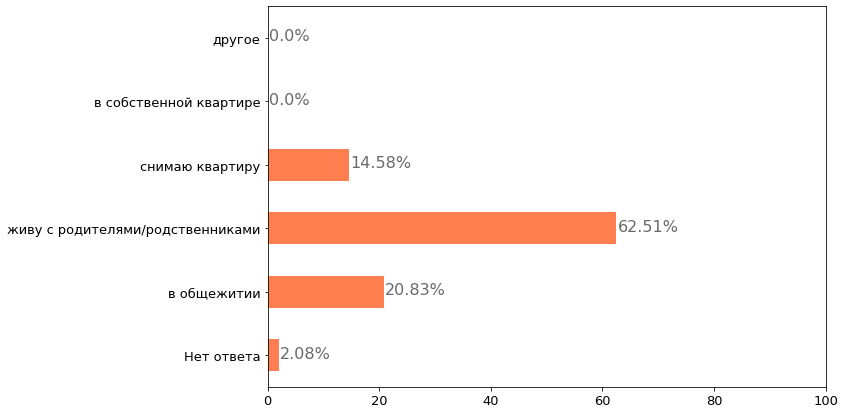

Нет ответа                           2.08
в общежитии                         20.83
живу с родителями/родственниками    62.50
снимаю квартиру                     14.58
в собственной квартире               0.00
другое                               0.00
Name: Воу воу воу, dtype: float64

In [0]:
result = dict_trans_val_to_key( {'в общежитии': 1, 'живу с родителями/родственниками': 2, 'снимаю квартиру': 3, 'в собственной квартире': 4, 'другое': 5})
print(result)
variant_answer(data.DemStSityStatus.astype(float).replace(result), dict_value=result,name='Воу воу воу')

In [0]:
def create_range(data, step=5, max_temp=100):
  min = data.astype(float).min()
  max = data.astype(float).max()
  if min  is np.nan or max is np.nan:
    return 
  max = max_temp if max_temp < max else max
  result = [i for i in range(int(min),int(max), step)]
  ranges = ['{}-{}'.format(result[ind],result[ind+1]) for ind, i in enumerate(result) if len(result) != ind+1]
  ranges.append(str(result[-1])+ '+')
  result.append(np.inf)
  return result, ranges 




In [0]:
def average(data):
  return data.value_coun  ts(dropna=False, normalize=True).mul(100).round(2)

In [0]:
def newline(line,num):
  line_lst = line.split(' ')
  for l in range(2,len(line_lst)):
    if l % num == 1:
      line_lst.insert(l, '\n')
  if len(line_lst) > 5:
    line_lst.insert(-2, '\n')
    line_lst.insert(-3, '\n')
  return ' '.join(line_lst)

def dict_trans_val_to_key(dict_value, num = 2, Table=False):
  dict_result = dict()
  for key in dict_value:
    if Table:
      dict_result[float(dict_value[key])] = key
    else:
      dict_result[float(dict_value[key])] = newline(key,num)
  dict_result[np.nan] = 'Нет ответа'
  return dict_result

# Добавляет значения, которых нет 
def add_variant(data_average,dict_value):
  print(data_average)
  flag = False
  dict_val = None
  if not dict_value is None:
    dict_val = data_average.to_dict()
    for val in dict_value.values():
      if val not in dict_val.keys():
        flag = True
        dict_val[val] = float(0)
  return flag, pd.DataFrame.from_dict(dict_val, orient='index', columns=[name])[name]

def max_min(data_range):
  pass



# проблема с тем что считается среднее 
def variant_answer(data, name, dict_value=None, new_line=False,
                   text='', title_up='',title_down='',
                   fontsize_plot=13, fontsize_titel=18, plot='barh', figsize=(10,7)):
  
  
  data_average = average(data).sort_index()
  # flag = False
  # if not dict_value is  None:
  #   flag, data_average = add_variant(data_average,dict_value)
  # if  not flag:
  if new_line:
    d2 = dict((k, f(v)) for k,v in d.items())

  fisrt = data_average.plot(kind='barh',figsize=figsize,
                                          color="coral", fontsize=fontsize_plot,xlim=(0,100))
  totals = []

  fisrt.set_alpha(0.4)
  fisrt.set_title(title_up, fontsize=fontsize_titel)
  fisrt.set_xlabel(title_down, fontsize=fontsize_titel);

  for i in fisrt.patches:
      totals.append(i.get_width())

  # set individual bar lables using above list
  total = sum(totals)

  for i in fisrt.patches:
      # get_width pulls left or right; get_y pushes up or down
      fisrt.text(i.get_width()+.2, i.get_y()+.21, \
              str(round((i.get_width()/total)*100, 2))+'%', fontsize=16,color='dimgrey')
  
  fig = fisrt.get_figure()
  fig.savefig("images/{}{}.png".format(name,text[:50]))
  plt.show()
  # del fig 
  return  data_average.to_frame()
  # fisrt.plot(kind='barh')

# variant_answer(data.DemStSex)

In [0]:
newline('целевая ( договор о целевом обучении с последующим трудоустройством)', 3)

'целевая ( договор о \n целевом обучении \n с \n \n последующим трудоустройством)'

In [11]:
data_1 = {'row_5': 3, 'row_2': 4,'row_3': 5}
data_2 = {'row_4': 3, 'row_6': 4,'row_3': 5}
df1 = pd.DataFrame.from_dict(data_1, orient='index', columns=['Demst'])
df2 = pd.DataFrame.from_dict(data_2, orient='index', columns=['Demst'])
df1.append(df2).sort_index()

,Demst
row_2,4
row_3,5
row_3,5
row_4,3
row_5,3
row_6,4


In [0]:
dict_trans_val_to_key( {'в общежитии': 1, 'живу с родителями/родственниками': 2, 'снимаю квартиру': 3, 'в собственной квартире': 4, 'другое': 5})

{1.0: 'в общежитии',
 2.0: 'живу с родителями/родственниками',
 3.0: 'снимаю квартиру',
 4.0: 'в собственной квартире',
 5.0: 'другое',
 nan: 'Нет ответа'}

In [0]:
quest = get_yaml(r'dictionary_Stereotype.yml')

{'Ответы': {'Оба': 1, 'Мужчина': 2, 'Женщина': 3}, 'Подвопросы': [{'Подвопрос': 'Поступить в вуз на математические и инженерные дисциплины', 'Ключ': 'Stereotype1'}, {'Подвопрос': 'Разобраться в карте незнакомой местности', 'Ключ': 'Stereotype2'}, {'Подвопрос': 'Поладить с маленькими детьми', 'Ключ': 'Stereotype3'}, {'Подвопрос': 'Много общаться с людьми', 'Ключ': 'Stereotype4'}, {'Подвопрос': 'Генерировать новые идеи', 'Ключ': 'Stereotype5'}, {'Подвопрос': 'Планировать семейный бюджет', 'Ключ': 'Stereotype6'}, {'Подвопрос': 'Создавать уют в доме', 'Ключ': 'Stereotype7'}, {'Подвопрос': 'Разобраться в инструкции к новой технике', 'Ключ': 'Stereotype8'}, {'Подвопрос': 'Справиться с руководящей должностью', 'Ключ': 'Stereotype9'}, {'Подвопрос': 'Получить высокооплачиваемую работу', 'Ключ': 'Stereotype10'}, {'Подвопрос': 'Справиться с неожиданной ситуацией на дорогах, управляя транспортным средством', 'Ключ': 'Stereotype11'}]}


In [0]:
display(HTML("""
<style>
.output_image>img {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))


#ПРОБЛЕМА С ГЕНЕРАЦИЕЙ ЕГЭ
# ПРОБЛЕМА С МАШТАБИРОВАНИЕМ ГРАФИКОВ
# ПРОБЛЕМА С 



def create_execel(name, test, out,count, yamls, show=False, text1='',space=2, num=25):
  print(name)
  global title
  # name = r'«Московский педагогический государственный  университет».csv'
  psycho = pd.read_csv(name, sep=',', error_bad_lines=False)
  psycho = psycho.rename(columns=psycho.iloc[0])
  psycho = psycho.iloc[1:]
  psycho = psycho.dropna(thresh=6)
  name = os.path.split(name)[-1]
  # name = os.path.join(out,test+ '_' + name.split('.')[0])
  data = data_remove_filter(psycho, yamls)
  print(data)
  data.head(10)
  def exel_manipulation(result, sheet_name, count,step, pred=0, cell_image='D', size=40, scale=0.75, font_size=18,len_data=0):
    len_data = pred if pred > len(result) else len(result)
    number_step = (len_data + 1)*count+count*step + space
    print(number_step, 'Степ')
    # print('Количество записей', len(result), 'Index', count+1, 'Нзвание ячейки',cell_image+str(len(result)*(count)+2), 'Количество сдвига', len(result)*(count+1)+2)
    result.to_excel(writer, sheet_name=sheet_name[:31], startrow=number_step)
    workbook = writer.book
    worksheet = writer.sheets[sheet_name[:31]]
    worksheet.set_column('A:A', size)
    worksheet.set_column('B:B', size)
    cell_format = workbook.add_format({'bold': True, 'font_size': font_size})
    worksheet.write_string(number_step-1, 1, text1,cell_format)
    worksheet.insert_image(cell_image+str(number_step + 1), r'images/{}{}.png'.format(sheet_name,text1[:50]), {'x_offset': 15, 'y_offset': 10, 'x_scale': scale , 'y_scale': scale})

  def range_table(data, i,max_temp_age=25, max_temp_all=100):
    describe = data.describe()
    print(describe)
    title = item['Вопрос']
    if 'float64' == describe.dtype or 'Age' in i:
      print('Рендж дата', i)
      data_sort = data.astype(float)
      display(HTML('<h1>{}</h1>'.format(title)))
      
      #Отображение ренж даты
      try:
        if 'Age' in i:
          bins, labels = create_range(data_sort, max_temp=max_temp_age)
        else:
          bins, labels = create_range(data_sort, max_temp=max_temp_all)
        data_replace = pd.cut(data_sort, bins=bins, labels=labels)
        data_replace=data_replace.replace(np.nan, 'Нет ответа', regex=True)
      except Exception as e:
        data_replace=data_sort.replace(np.nan, 'Нет ответа', regex=True)
      

      table = variant_answer(data_replace, text=text1, title_up=title, fontsize_plot=13,figsize=(15,7),name=i)
      table.columns = [title]
      display(table)

    # Отображение есть ответ нет ответа
    else:
      display(HTML('<h1>{}</h1>'.format(title)))
      data_replace=data.apply(lambda s: 'Есть ответ' if isinstance(s,str) else 'Нет ответа')
      table = variant_answer(data_replace, text=text1,title_up=title, fontsize_plot=13,figsize=(15,5),name=i)
      table.columns = [title]
      display(table)
    return table

  temp = ''
  num = 25
  for i in data.columns[:]:
    title = ''
    for item in quest:
        # if 'totalTime' in i and 'DemStCareerValue' not in i:
        #   title = 'Затраченное время на вопрос'
        #   print(i)
        #   data_sort = data[i].astype(float)
        #   describe = data_sort.describe()
        #   display(HTML('<h1>{}</h1>'.format(title)))
        #   try:
        #     bins, labels = create_range(data_sort, max_temp=100)
        #     data_replace = pd.cut(data_sort, bins=bins, labels=labels)
        #     data_replace=data_replace.replace(np.nan, 'Нет ответа', regex=True)
      

        #     table = variant_answer(data_replace, title_up=title, fontsize_plot=10,figsize=(17,10),name=i)
        #     table.columns = [title]
        #     # table = pd.concat([table, describe.T], axis=0)
        #     display(table)
        #     exel_manipulation(table,i)
        #     break
        #   except:
        #     break
        if 'Ключ' in item and item['Ключ'] == i:
          if 'Ответы' in item:
            try: 
              # Отображение по словарю данные
              data_sort = data[i].astype(float).sort_values(ascending=True)
            except ValueError:
              # Отображение по словарю данные , данные в виде списка
              data_sort = data[i].replace(np.nan,'[0]', regex=True).apply(json.loads)
      
              listmerge = lambda ll: [el for lst in ll for el in lst]
              data_sort = listmerge(data_sort.to_list())
              data_sort = pd.DataFrame({i:data_sort}).astype(float)
              data_sort = data_sort[i].replace(0, np.nan, regex=True)
            answer = item['Ответы']
            title = item['Вопрос']
            display(HTML('<h1>{}</h1>'.format(title)))

            data_replace = data_sort.replace(dict_trans_val_to_key(answer,num=2))
            data_replace_table = data_sort.replace(dict_trans_val_to_key(answer, Table=True))
            a = variant_answer(data_replace, text=text1, title_up=title, fontsize_plot=12,figsize=(19,10), name=i)
            table = average(data_replace_table).to_frame().sort_index()
            # flag, table = add_variant(table, dict_trans_val_to_key(answer,num=2))
            table.columns = [title]
            if show:
              display(table)
            exel_manipulation(table,i,count,num, len_data=len(dict_trans_val_to_key(answer, Table=True)))
            break
          else:
            # try:
            # ренджовые данные
            table = range_table(data[i],i)
            exel_manipulation(table,i,count,num)
            break
            # except Exception as e:
            #   print(e)
              # print(data[i].astype(str))
          
        # Отображение подвопросов  
        if not 'Ключ' in item:
          answer = item['Ответы']
          try:
            title = ''
            items = next(it for it in item['Подвопросы'] if it['Ключ'] == i)
            under_title = items['Подвопрос']
            if 'Вопрос' in item:
              title = item['Вопрос']
            display(HTML('<h1>{}</h1>'.format(title)))
            display(HTML('<h2>{}</h2>'.format(under_title)))
            data_replace = data[i].astype(float).replace(dict_trans_val_to_key(answer, num=4))
            data_replace_table = data[i].astype(float).replace(dict_trans_val_to_key(answer, Table=True))
            a = variant_answer(data_replace,text=text1, title_up=title + '\n' + under_title, fontsize_plot=13,figsize=(17,10),name=i)
            table = average(data_replace_table).to_frame().sort_index()
            table.columns = [under_title]
            if show:
              display(table)
            exel_manipulation(table,i,count, num)
            break
          except StopIteration:
            pass
        
  # files.download('{}.xlsx'.format(name))     
  # except Exception as e:
  #   print(e)
    # print(data[i])
    # print(item['Вопрос'])


{'Вопрос': 'Сколько Вам полных лет?', 'Ключ': 'DemStAge'}
{'Вопрос': 'Укажите Ваш пол', 'Ключ': 'DemStSex', 'Ответы': {'мужской': 1, 'женский': 2}}
{'Вопрос': 'Где Вы живете?', 'Ключ': 'DemStAccomodationStatus', 'Ответы': {'в общежитии': 1, 'живу с родителями/родственниками': 2, 'снимаю квартиру': 3, 'в собственной квартире': 4, 'другое': 5}}
{'Вопрос': 'Если другое, укажите какое', 'Ключ': 'DemStAccomodationStatus2'}
{'Вопрос': 'Опишите населенный пункт, в котором Вы проживаете', 'Ключ': 'DemStSityStatus', 'Ответы': {'в большом городе': 1, 'в небольшом городе': 2, 'в сельской местности': 3}}
{'Вопрос': 'В какой семье Вы растете (росли) и живете (жили)?', 'Ключ': 'DemStFamilyStatus', 'Ответы': {'с матерью и отцом': 1, 'в семье с одним родителем (без матери или без отца)': 2, 'с родственниками': 3, 'в интернате, детском доме': 4}}
{'Вопрос': 'На каких языках, кроме русского, Вы можете свободно говорить?', 'Ключ': 'DemStLangMain', 'Ответы': {'татарский': 1, 'украинский': 2, 'белорусский'

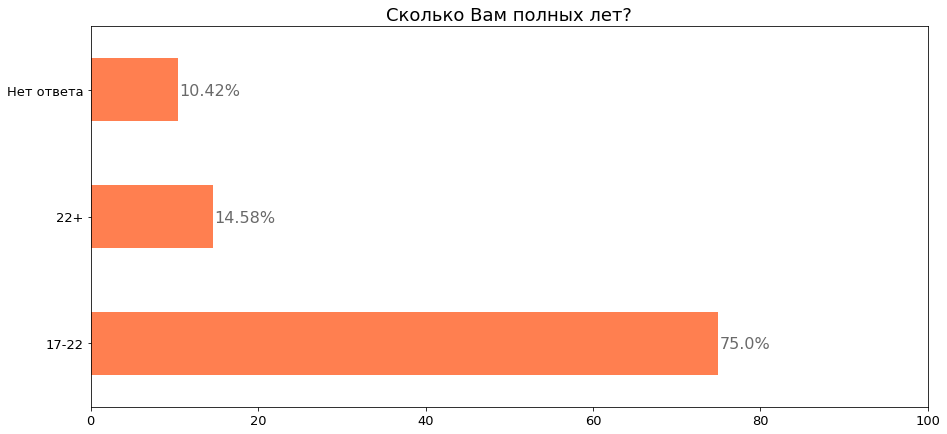

,Сколько Вам полных лет?
17-22,75.00
22+,14.58
Нет ответа,10.42


6 Степ


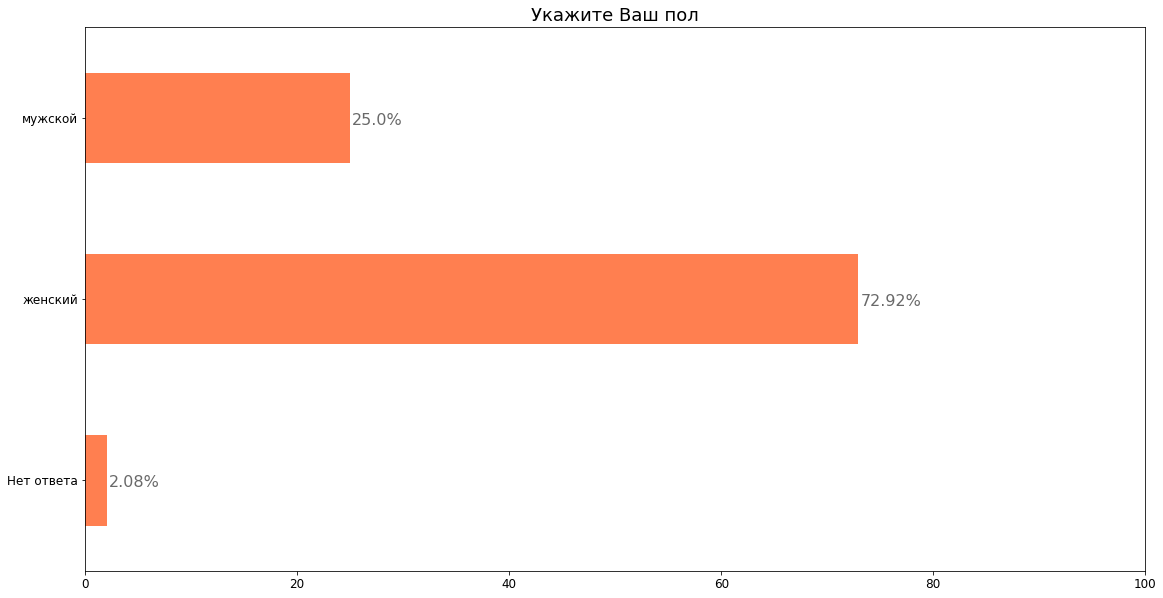

6 Степ


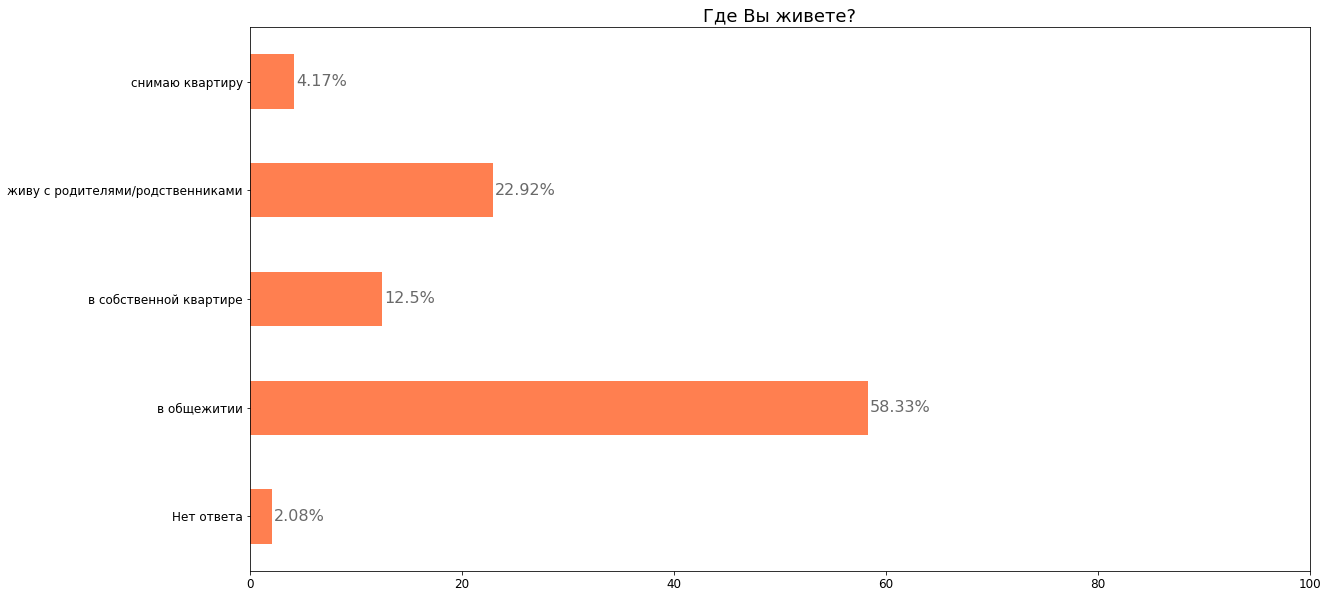

6 Степ
count       0
unique      0
top       NaN
freq      NaN
Name: DemStAccomodationStatus2, dtype: object


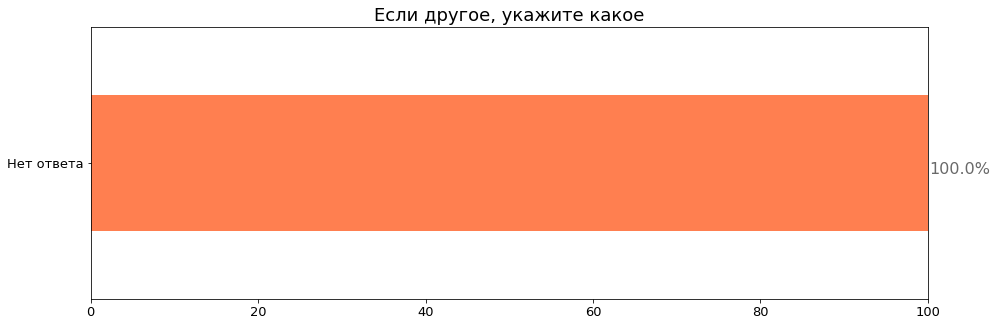

,"Если другое, укажите какое"
Нет ответа,100.0


6 Степ


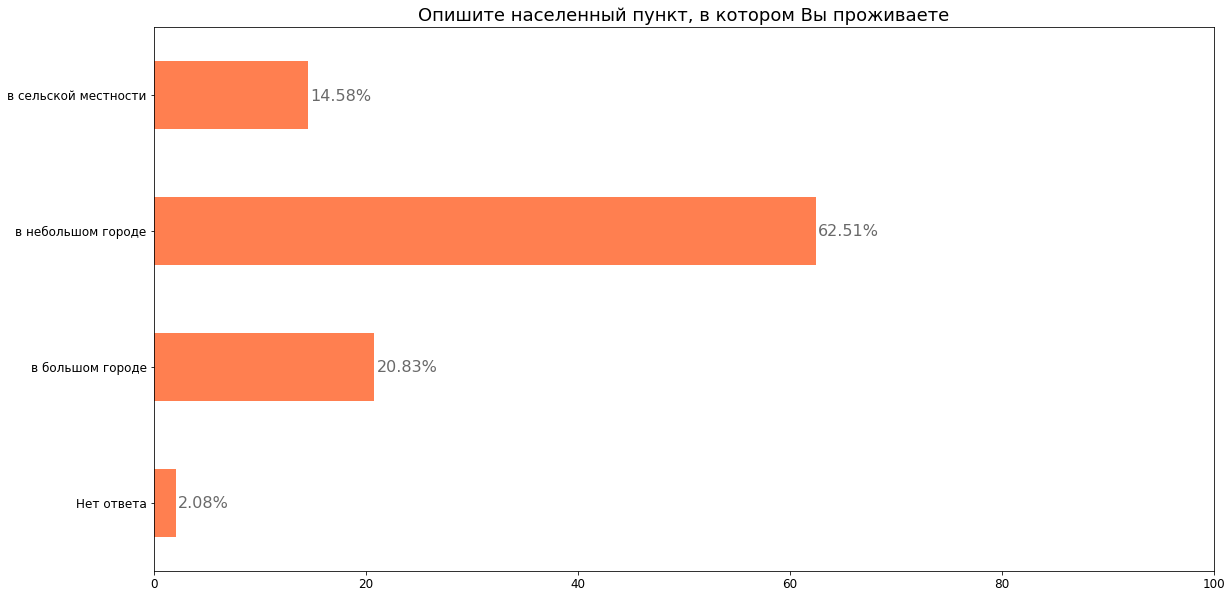

6 Степ


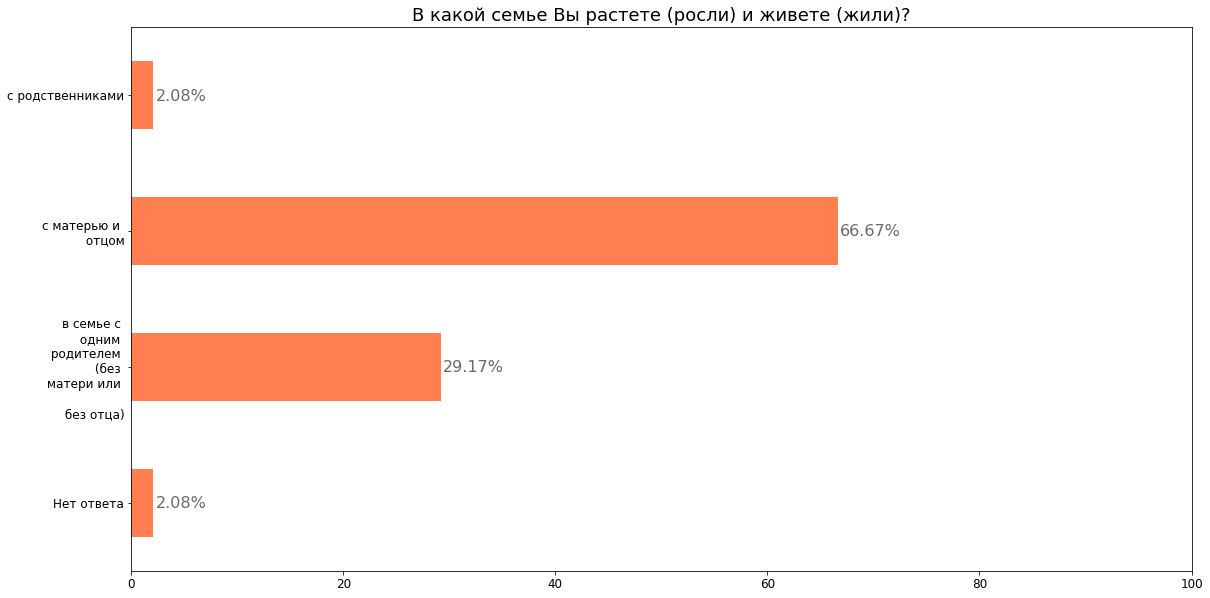

6 Степ


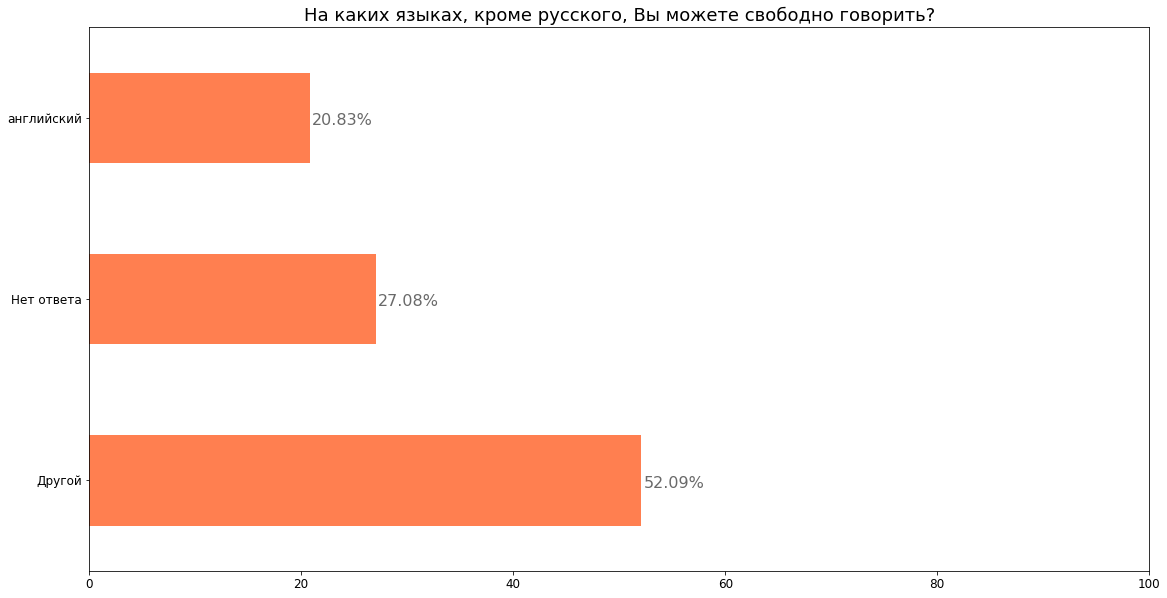

6 Степ
count           31
unique           8
top       якутский
freq            13
Name: DemStLangMainOther, dtype: object


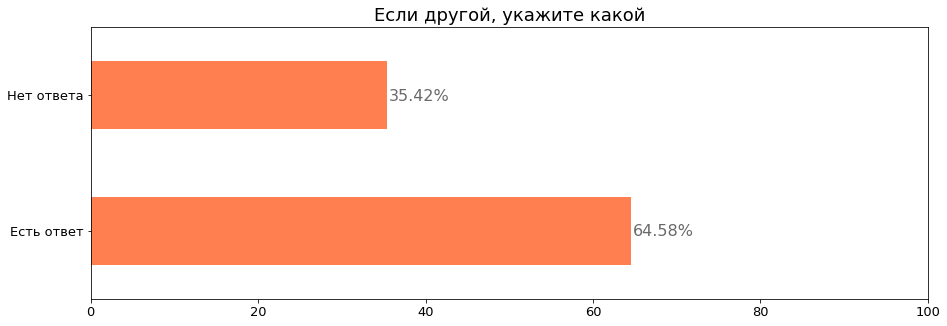

,"Если другой, укажите какой"
Есть ответ,64.58
Нет ответа,35.42


6 Степ


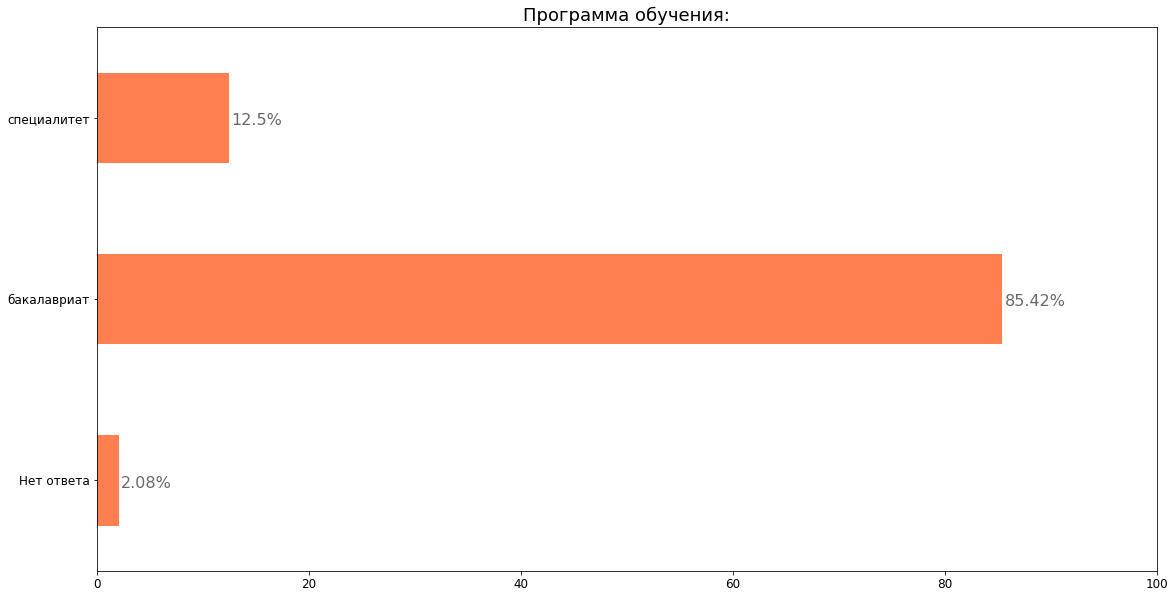

6 Степ


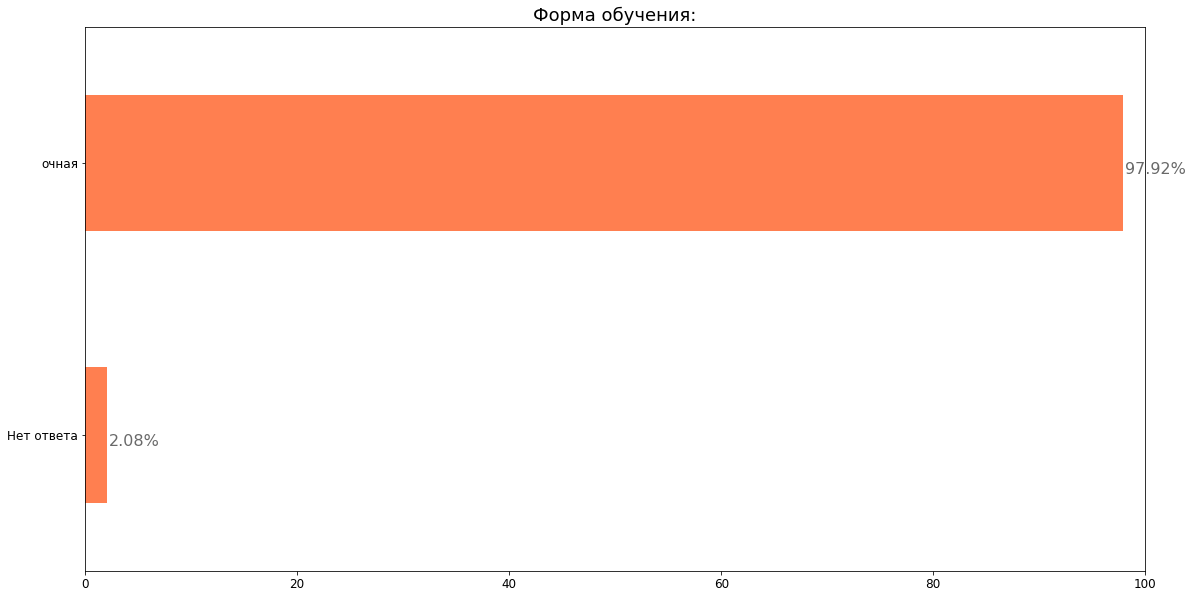

6 Степ


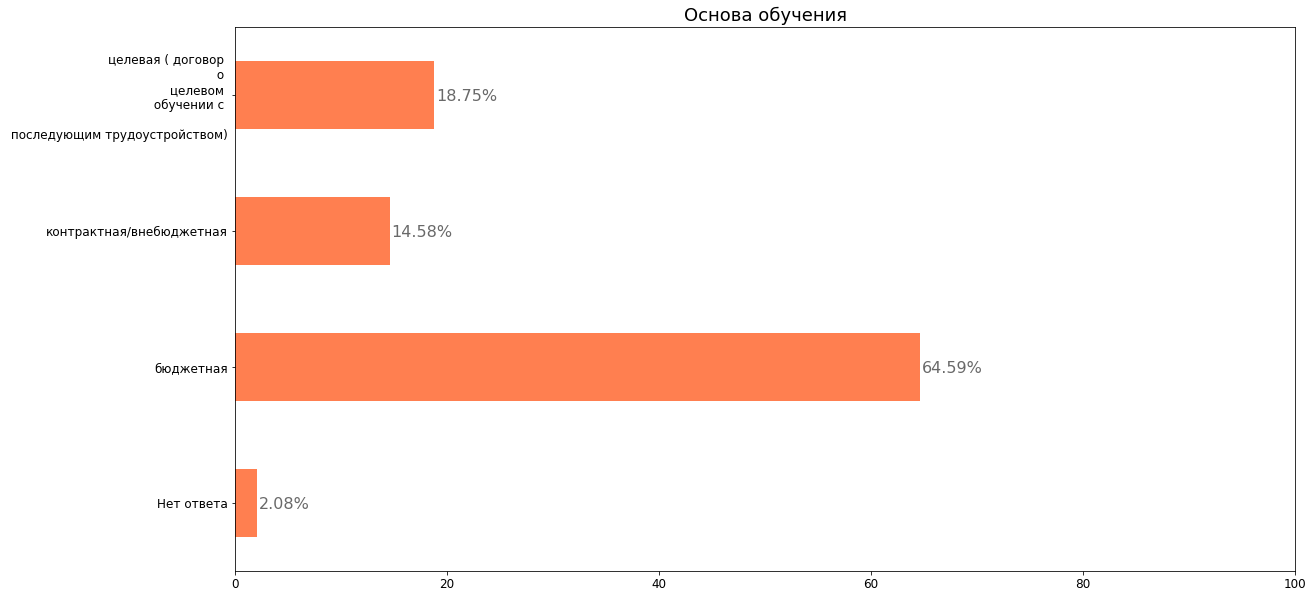

6 Степ


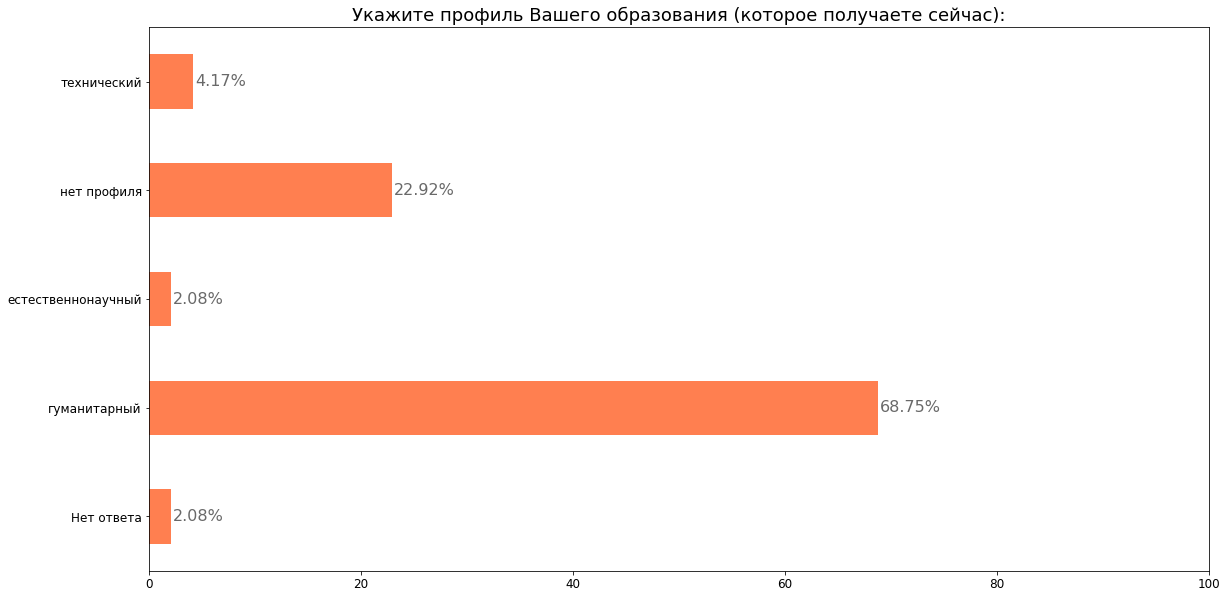

6 Степ


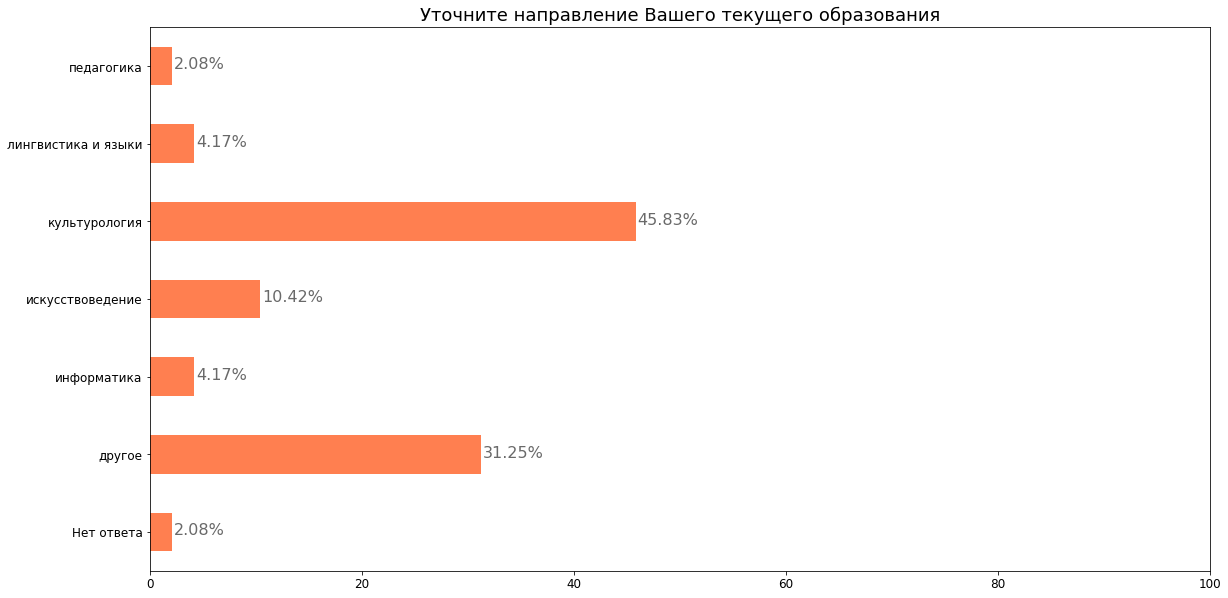

6 Степ
count                      21
unique                     17
top       Вокальное искусство
freq                        3
Name: DemStLangMain2, dtype: object


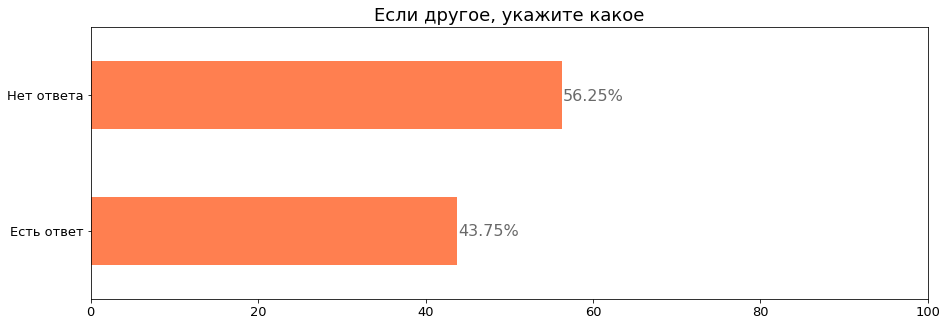

,"Если другое, укажите какое"
Есть ответ,43.75
Нет ответа,56.25


6 Степ


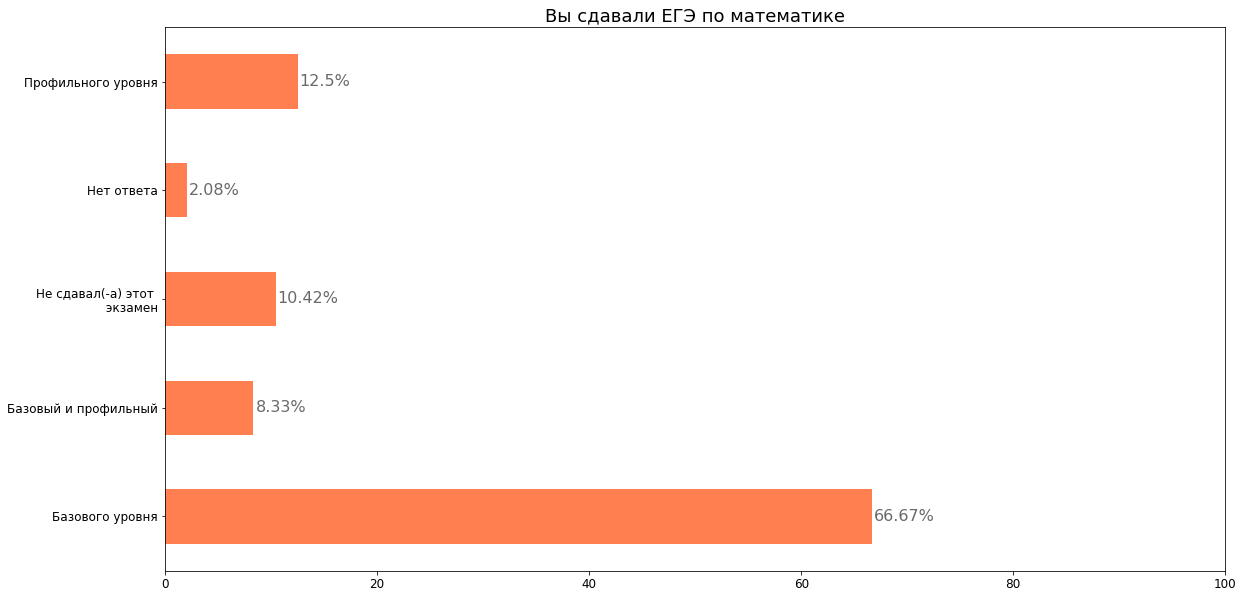

6 Степ
count     31
unique    16
top       20
freq      10
Name: DemStEGEMathBase, dtype: object


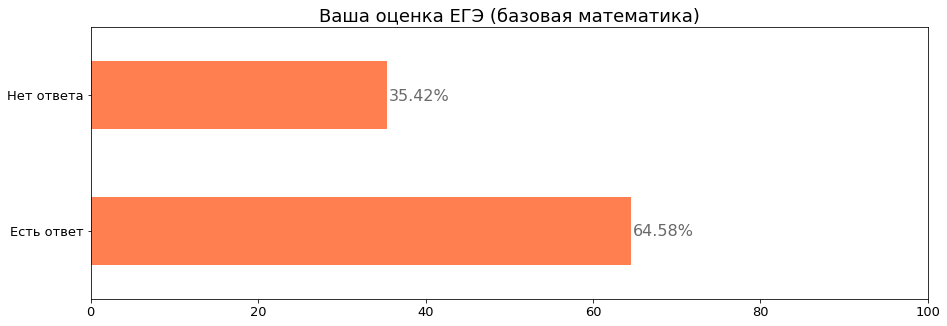

,Ваша оценка ЕГЭ (базовая математика)
Есть ответ,64.58
Нет ответа,35.42


6 Степ
count     10
unique     7
top       39
freq       2
Name: DemStEGEMathProfile, dtype: object


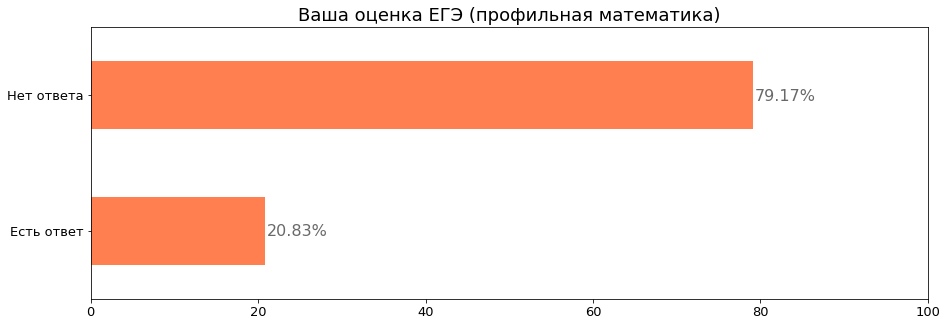

,Ваша оценка ЕГЭ (профильная математика)
Есть ответ,20.83
Нет ответа,79.17


6 Степ
count     41
unique    25
top       70
freq       5
Name: DemStEGErussian, dtype: object


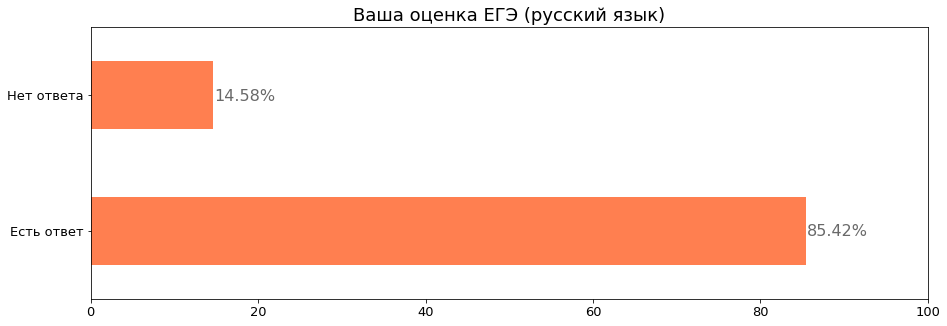

,Ваша оценка ЕГЭ (русский язык)
Есть ответ,85.42
Нет ответа,14.58


6 Степ
count       0
unique      0
top       NaN
freq      NaN
Name: DemStEGEphysics, dtype: object


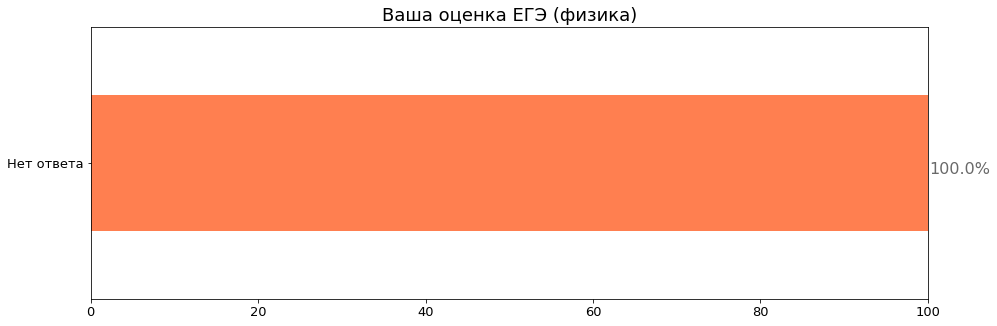

,Ваша оценка ЕГЭ (физика)
Нет ответа,100.0


6 Степ
count      3
unique     3
top       46
freq       1
Name: DemStEGEchemistry, dtype: object


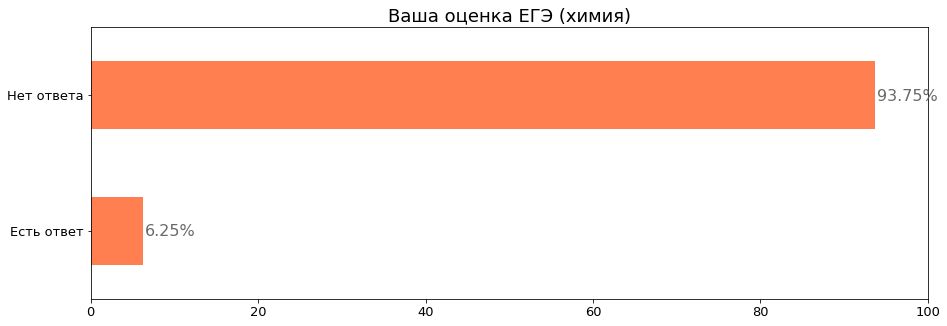

,Ваша оценка ЕГЭ (химия)
Есть ответ,6.25
Нет ответа,93.75


6 Степ
count      3
unique     2
top       42
freq       2
Name: DemStEGEbiology, dtype: object


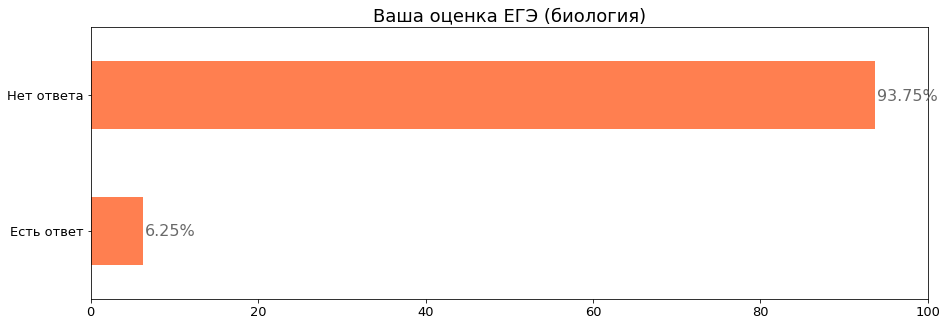

,Ваша оценка ЕГЭ (биология)
Есть ответ,6.25
Нет ответа,93.75


6 Степ
count      2
unique     2
top       64
freq       1
Name: DemStEGEcomputerScience, dtype: object


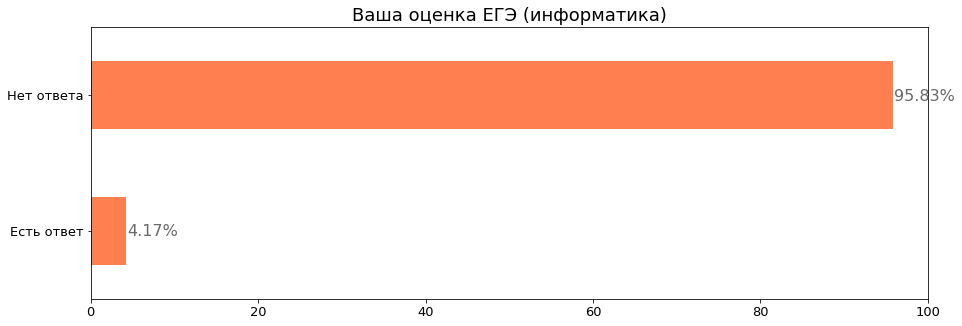

,Ваша оценка ЕГЭ (информатика)
Есть ответ,4.17
Нет ответа,95.83


6 Степ


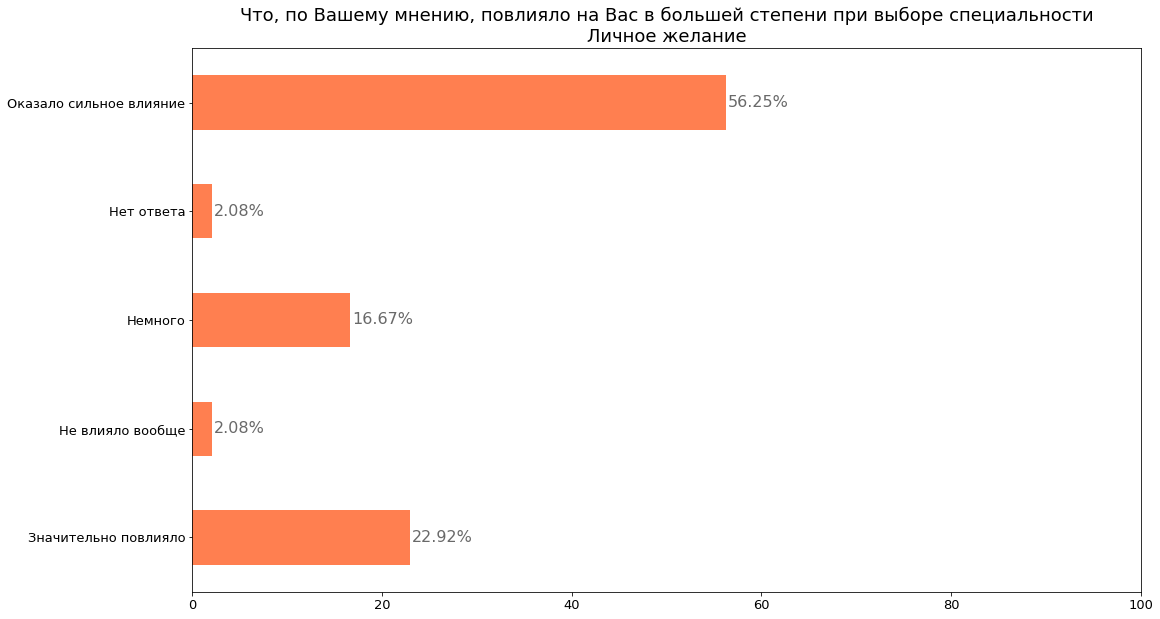

6 Степ


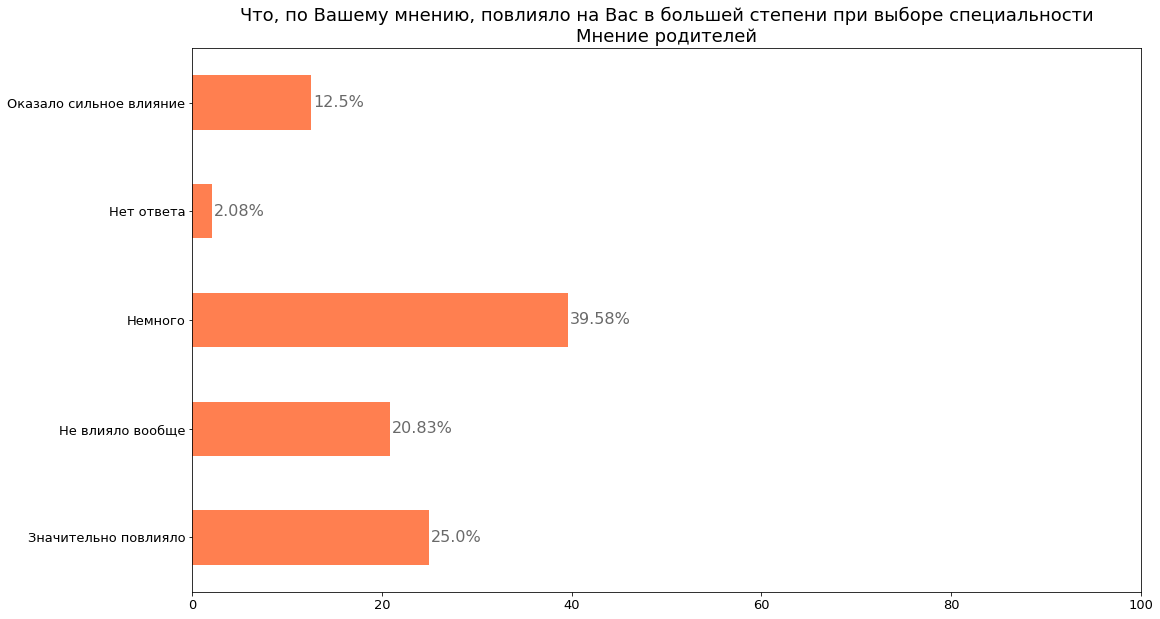

6 Степ


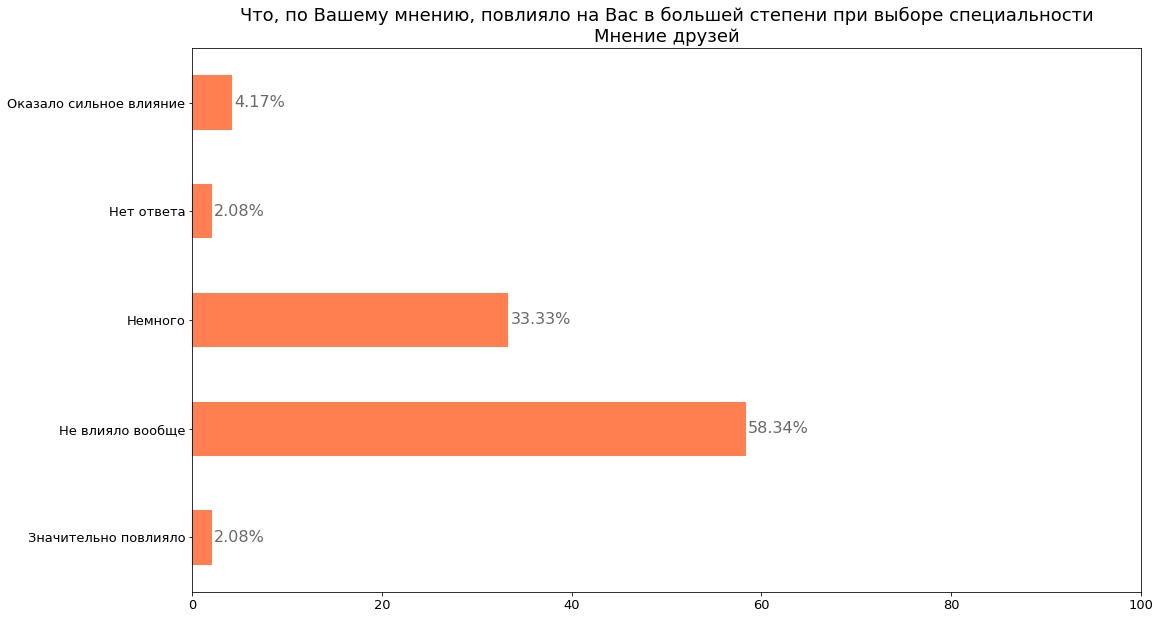

6 Степ


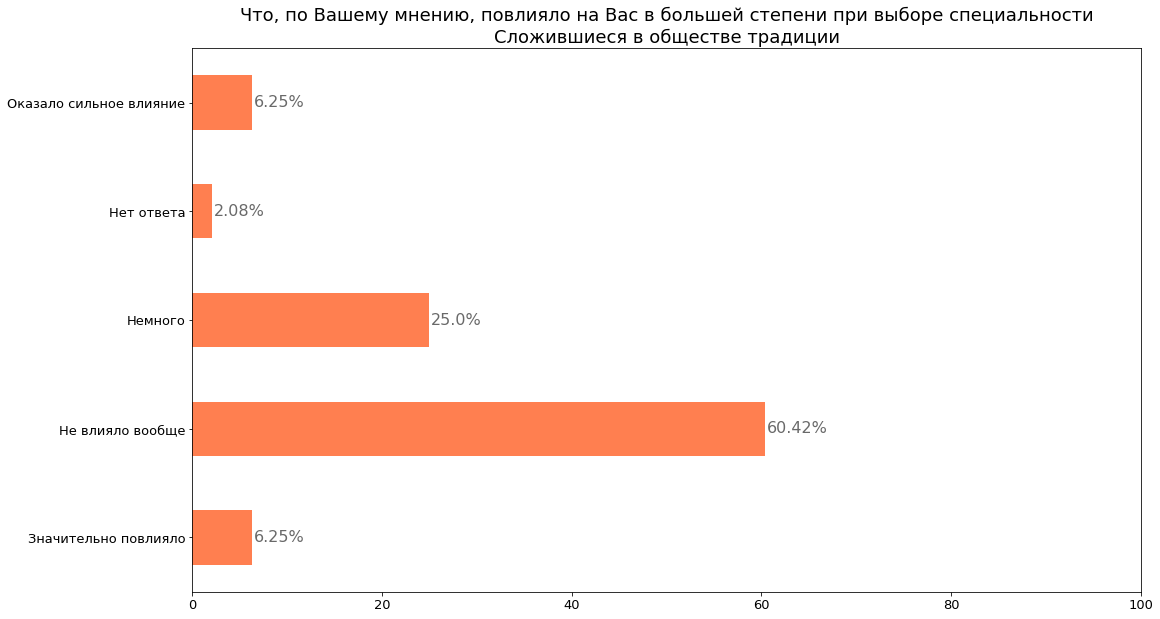

6 Степ


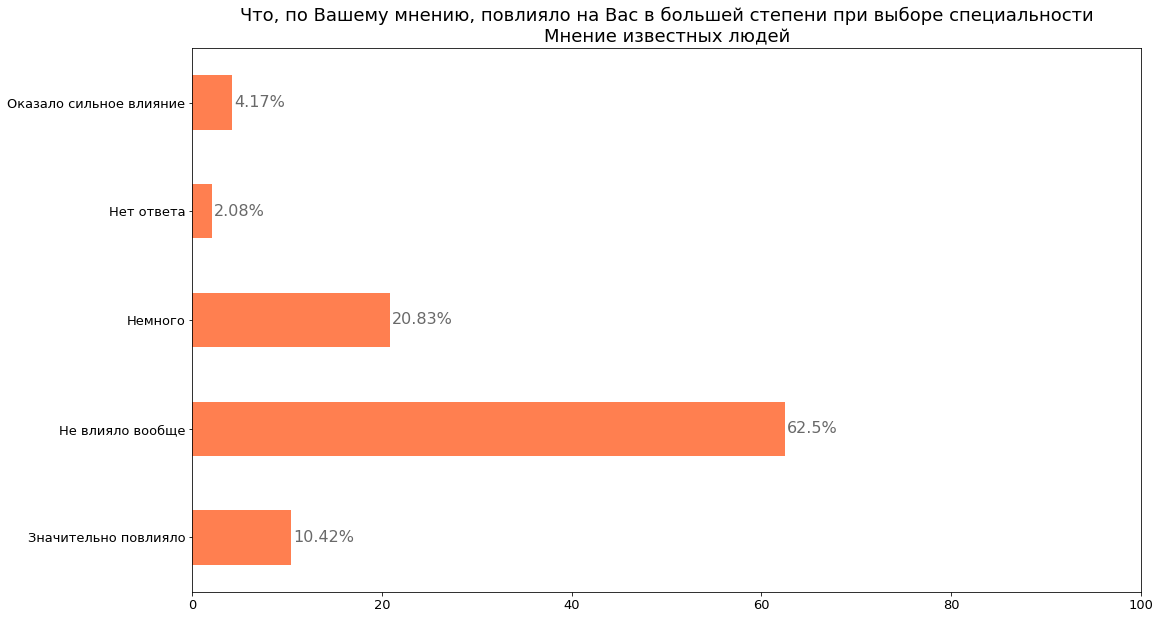

6 Степ


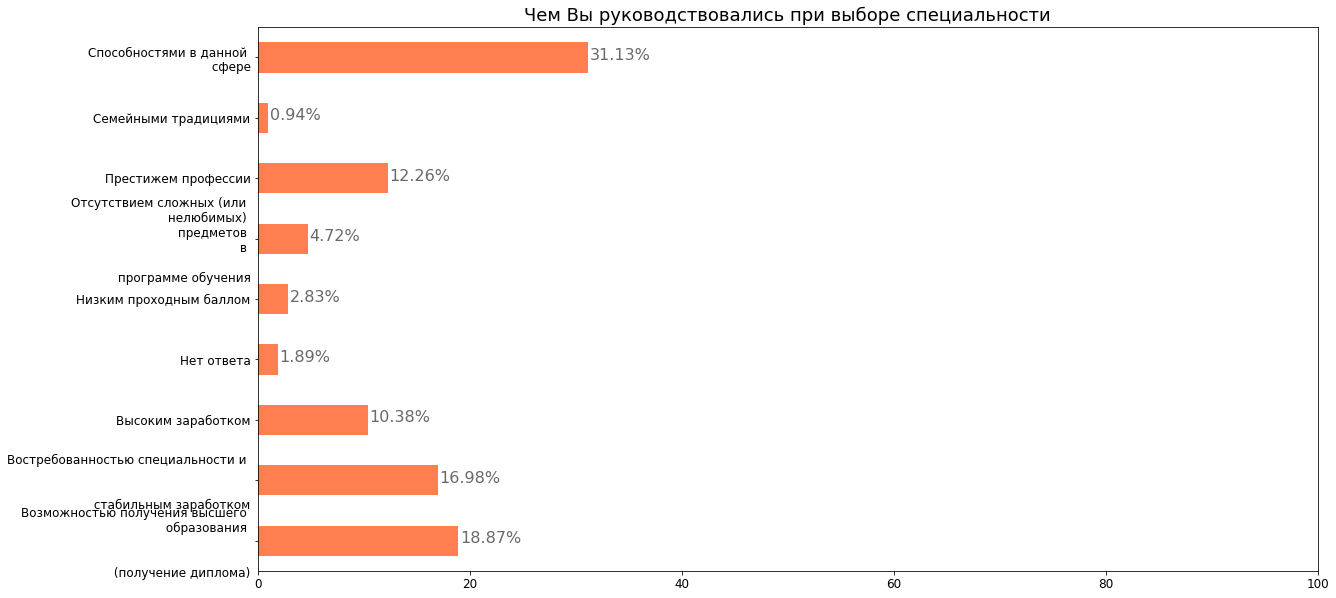

6 Степ


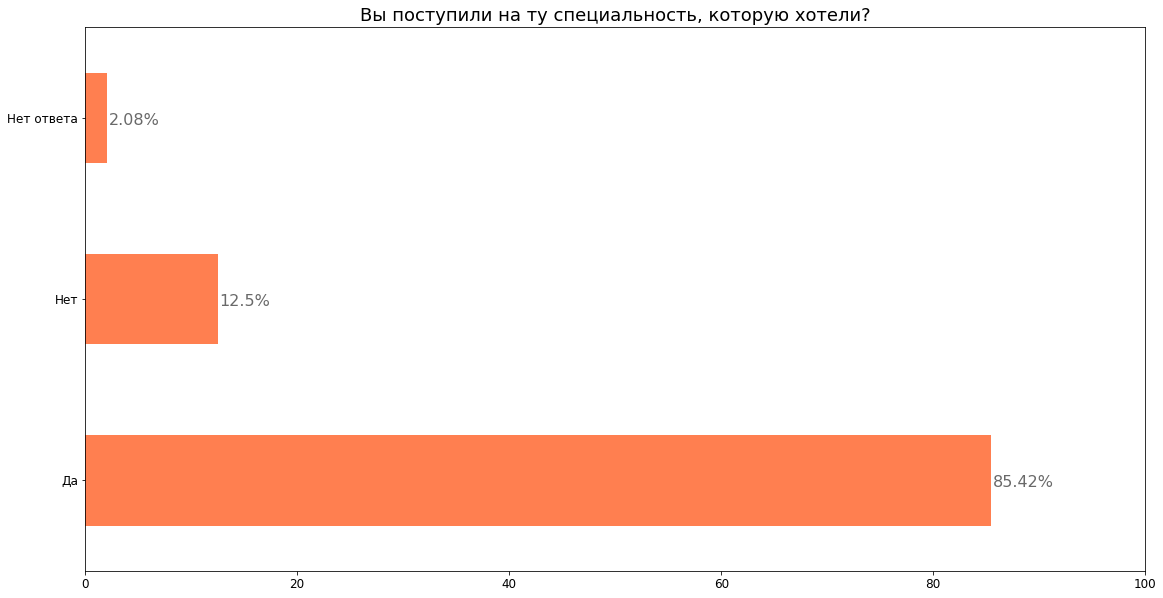

6 Степ
Студенты/«Иркутский государственный университет».csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning:

Columns (10,11,16,17,18,23,24,25,30,36,37,38,43,44,45,50,51,52,57,63,64,65,70,71,72,77,78,79,84,85,86,91,92,93,98,104,105,106,111,112,117,118,123,124,129,130,135,136,141,142,147,148,153,154,155,160,161,162,167,168,169,174,175,176,181,182,183,188,196,197,202,208,209,210,215,216,217,222,223,224,229,230,231,236,237,238,243,244,245,250,251,252,257,258,259,264,265,266,271,272,273,278,279,280,285,286,287,292,293,294,299,300,301,306,307,308,313,314,315,320,321,322,327,328,329,334,335,336,341,342,343,348,349,350,355,356,357,362,363,364,369,370,371,376,377,378,383,384,385,390,391,392,397,398,399,404,405,406,411,412,413,418,419,420,425,426,427,432,433,434,439,440,441,446,447,448,453,454,455,460,461,462,467,468,469,474,475,476,481,482,483,488,489,490,495,496,497,502,503,504,509,510,511,516,517,518,523,524,525,530,531,532,537,538,539,544,545,546,551,552,553,558,559,560,565,566,567,572,573,574,579,580,581,5

Загружен датасет - «Иркутский государственный университет».csv 
 Размер составляет (2221, 58)
     DemStAge  ... DemStCareerTrueChoice.totalTime
1          18  ...                           55.29
2          17  ...                          64.094
3          18  ...                         118.305
4          18  ...                          55.892
5          18  ...                          65.026
...       ...  ...                             ...
2217       22  ...                          89.599
2218       35  ...                           74.88
2219       23  ...                          73.162
2220       21  ...                          78.683
2221       21  ...                          73.673

[2221 rows x 58 columns]
count     2208.0
unique      39.0
top         18.0
freq      1169.0
Name: DemStAge, dtype: float64
Рендж дата DemStAge


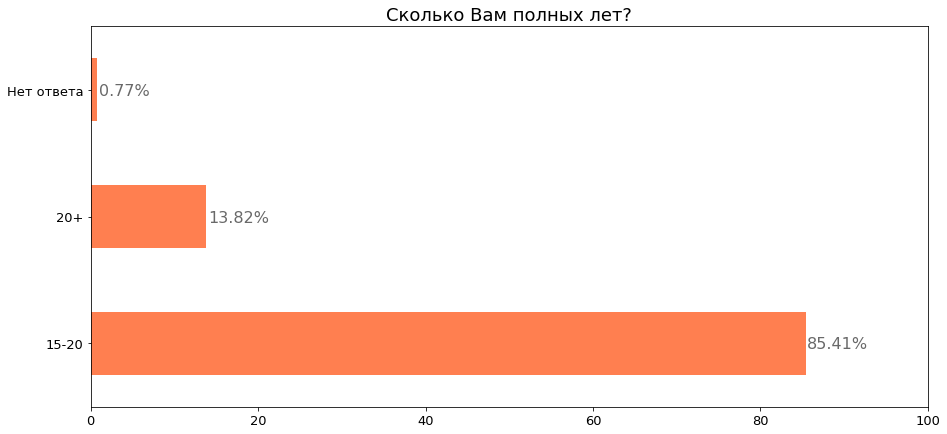

,Сколько Вам полных лет?
15-20,85.41
20+,13.82
Нет ответа,0.77


35 Степ


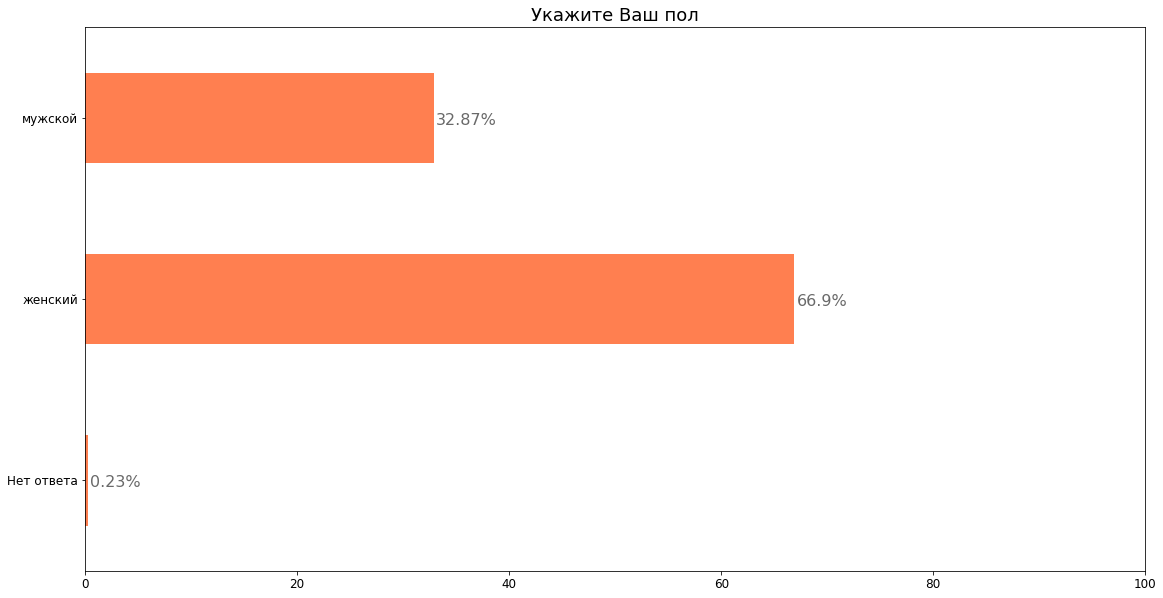

35 Степ


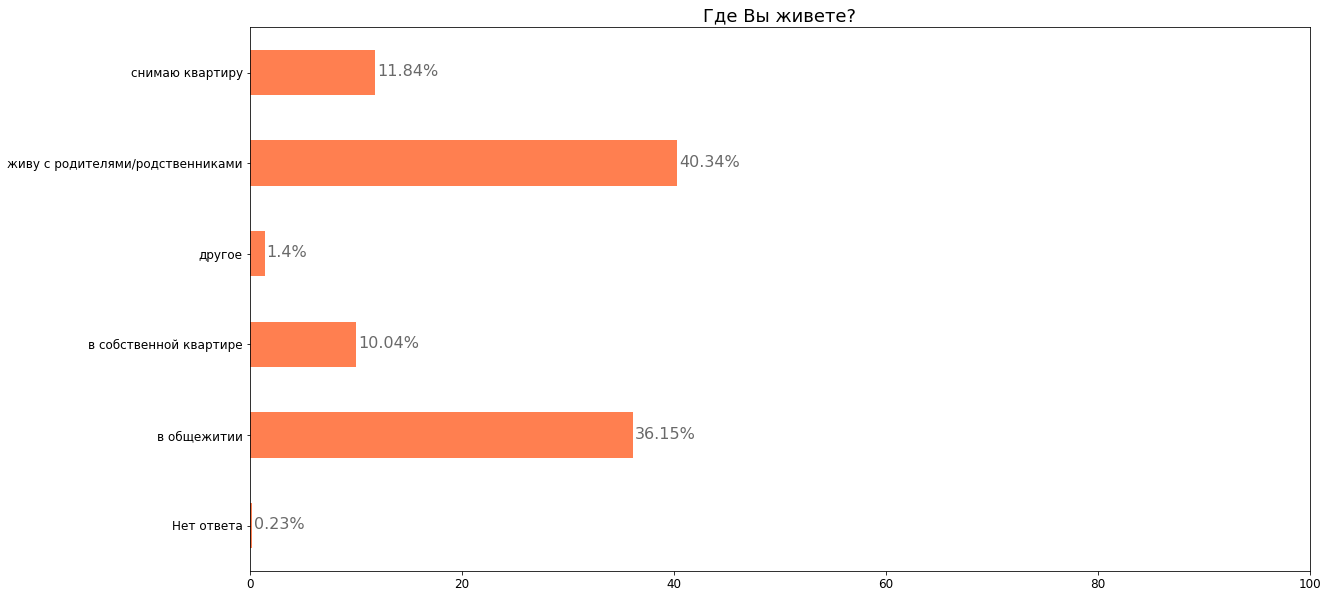

38 Степ
count      43
unique     39
top       дом
freq        3
Name: DemStAccomodationStatus2, dtype: object


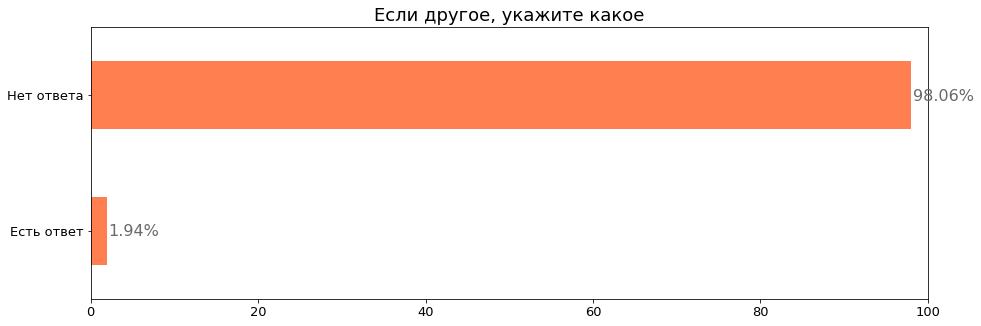

,"Если другое, укажите какое"
Есть ответ,1.94
Нет ответа,98.06


34 Степ


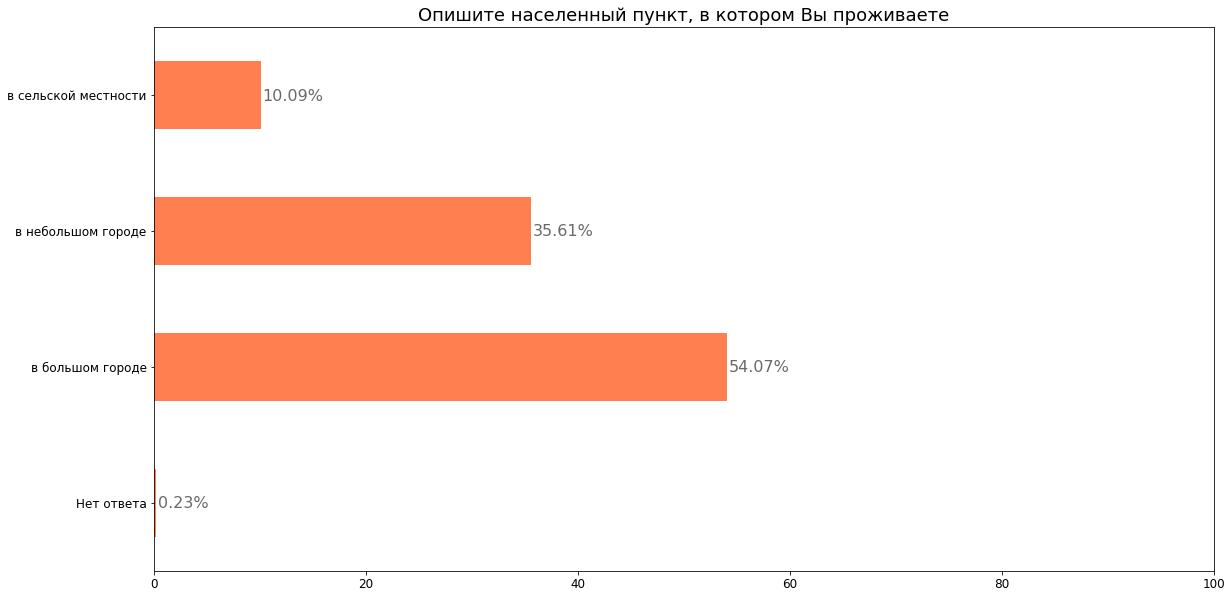

36 Степ


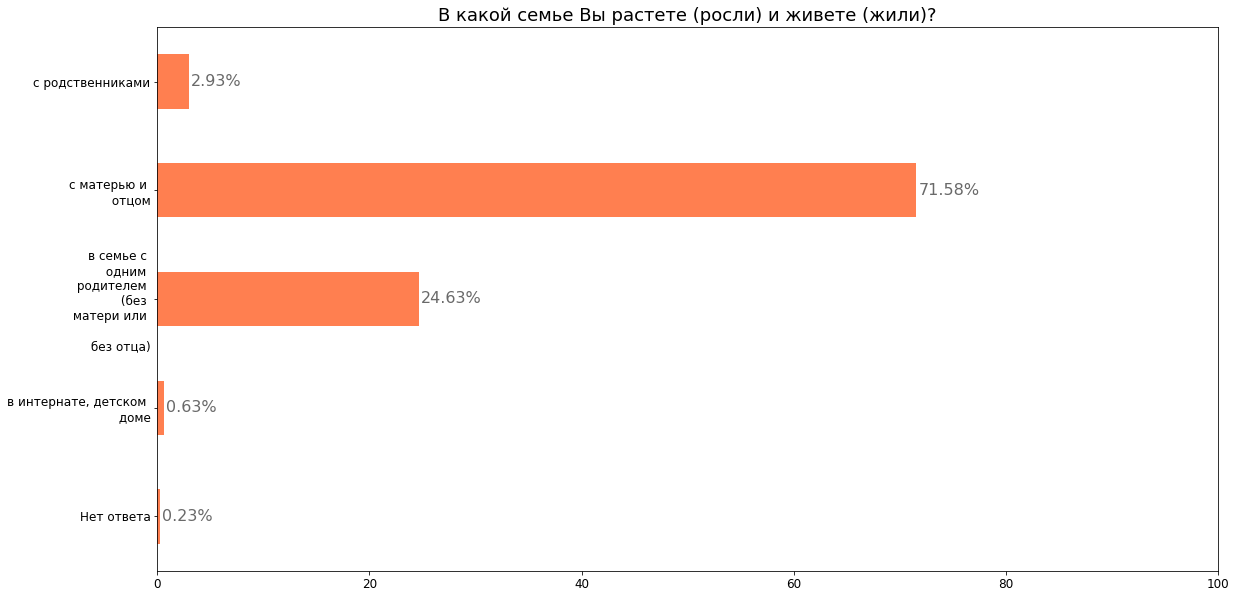

37 Степ


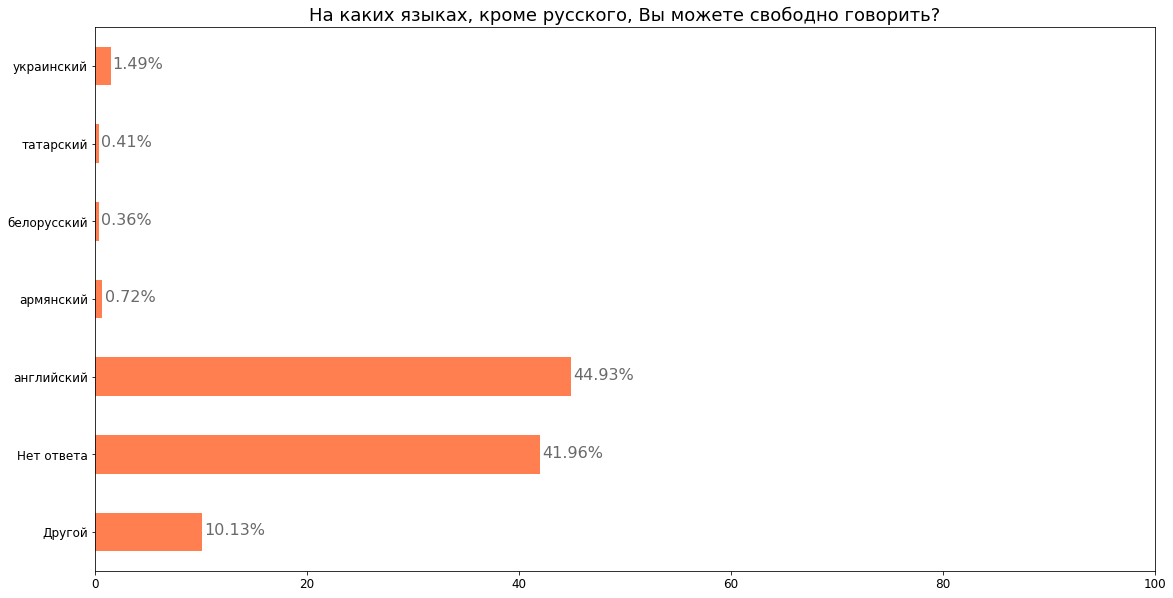

39 Степ
count           268
unique           81
top       бурятский
freq             58
Name: DemStLangMainOther, dtype: object


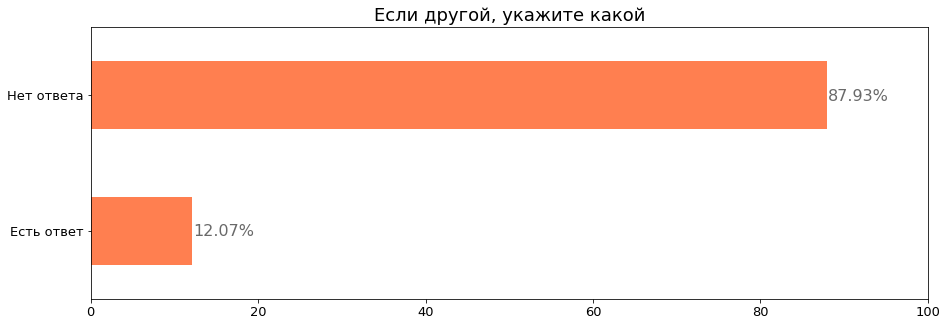

,"Если другой, укажите какой"
Есть ответ,12.07
Нет ответа,87.93


34 Степ


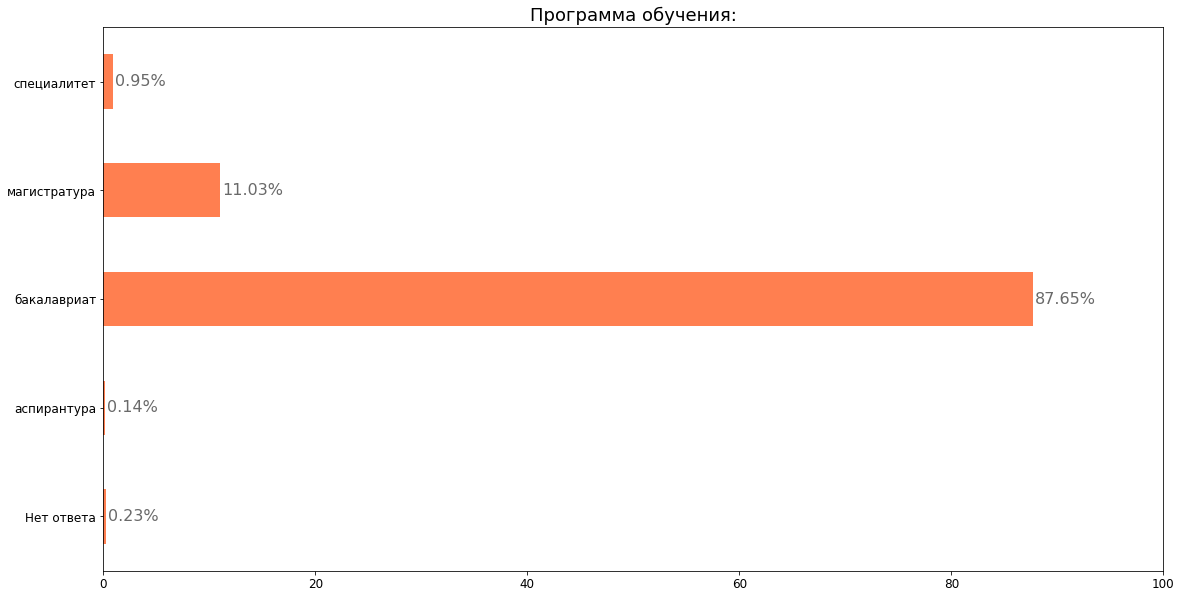

37 Степ


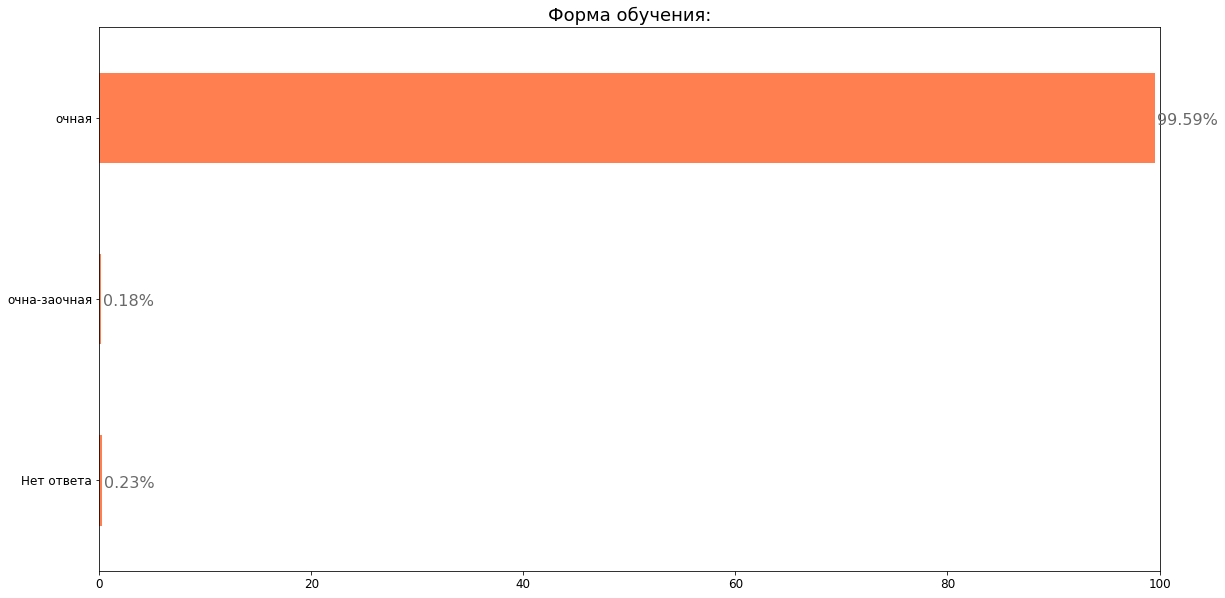

35 Степ


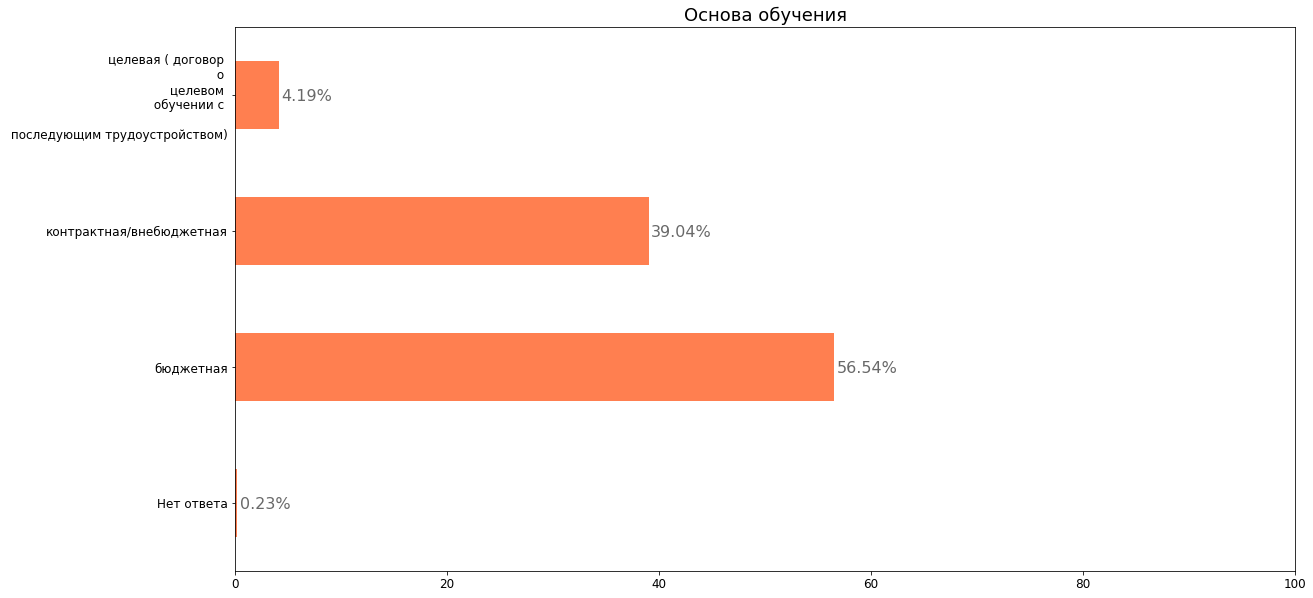

36 Степ


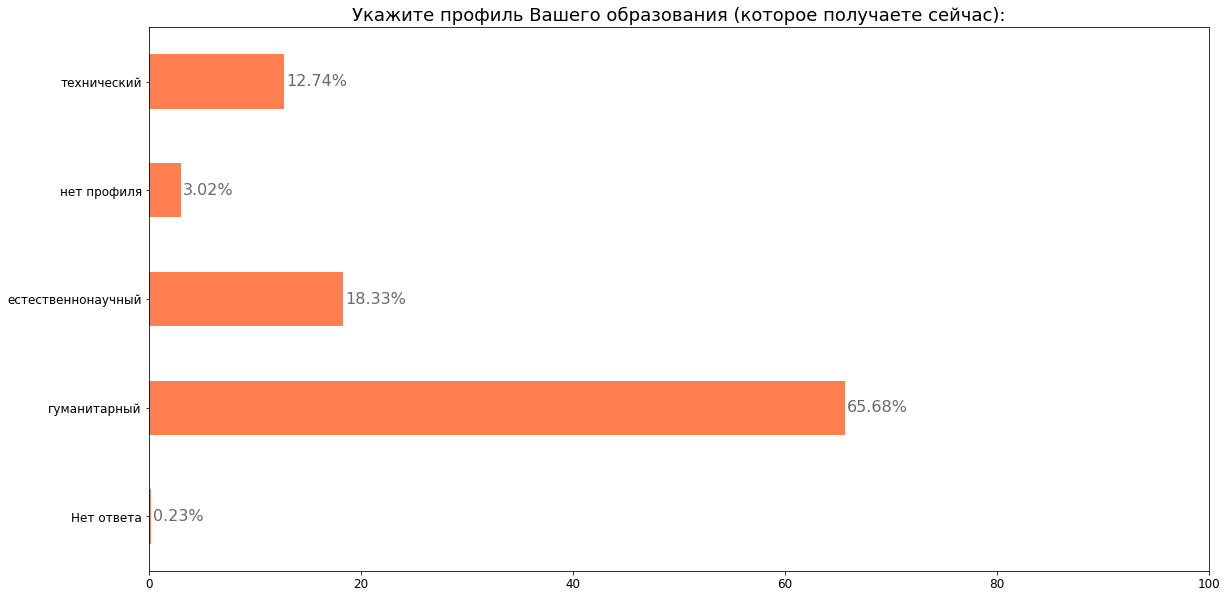

37 Степ


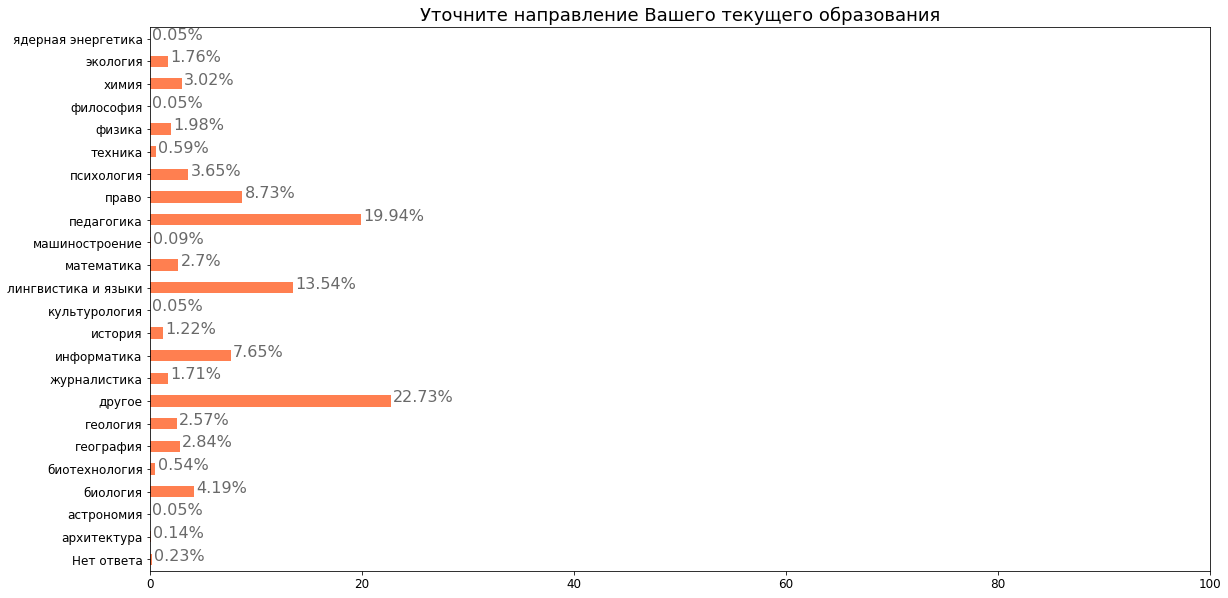

56 Степ
count               577
unique              170
top       юриспруденция
freq                 57
Name: DemStLangMain2, dtype: object


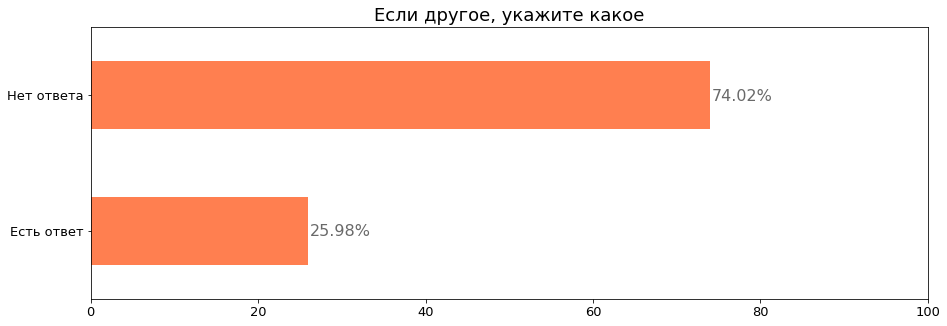

,"Если другое, укажите какое"
Есть ответ,25.98
Нет ответа,74.02


34 Степ


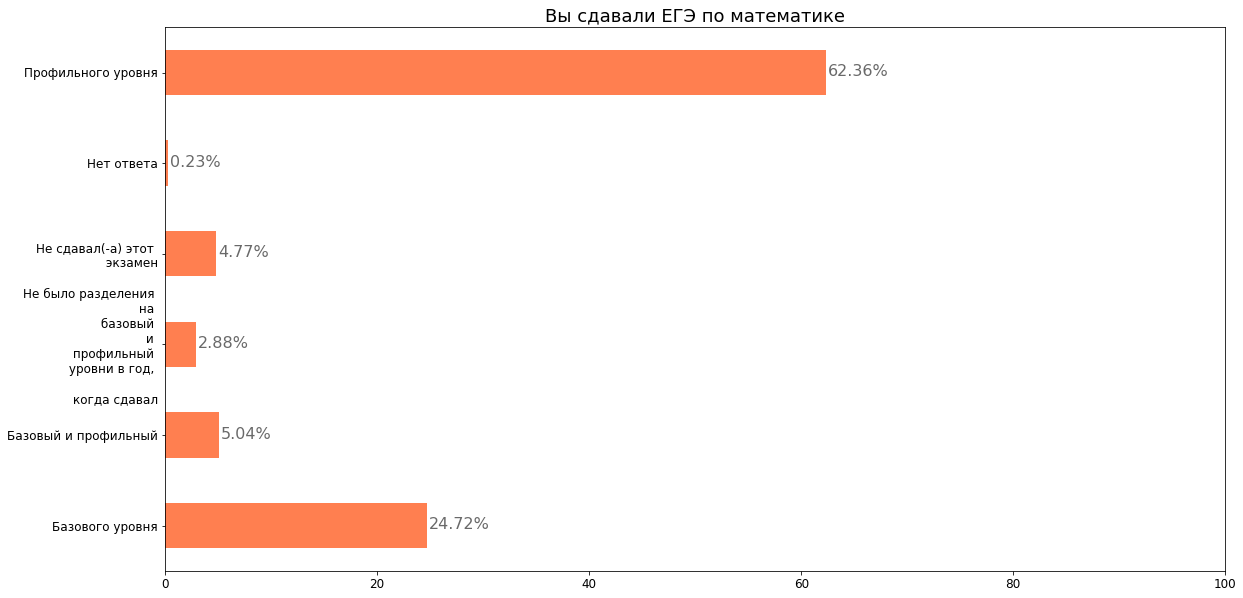

38 Степ
count     697.0
unique     64.0
top        20.0
freq      320.0
Name: DemStEGEMathBase, dtype: float64
Рендж дата DemStEGEMathBase


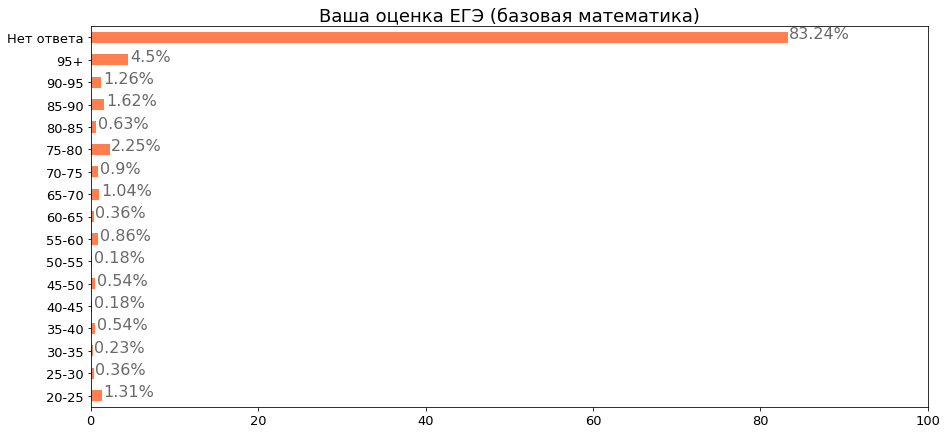

,Ваша оценка ЕГЭ (базовая математика)
20-25,1.31
25-30,0.36
30-35,0.23
35-40,0.54
40-45,0.18
45-50,0.54
50-55,0.18
55-60,0.86
60-65,0.36
65-70,1.04


49 Степ
count     1457.0
unique     106.0
top         50.0
freq       169.0
Name: DemStEGEMathProfile, dtype: float64
Рендж дата DemStEGEMathProfile


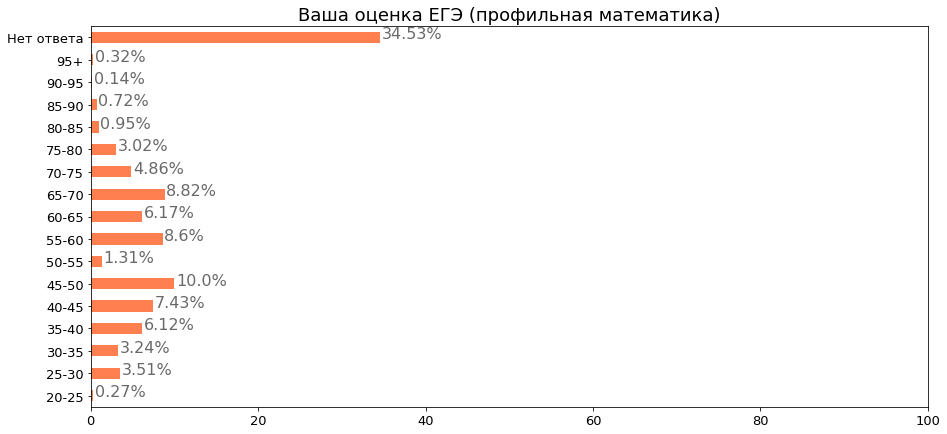

,Ваша оценка ЕГЭ (профильная математика)
20-25,0.27
25-30,3.51
30-35,3.24
35-40,6.12
40-45,7.43
45-50,10.00
50-55,1.31
55-60,8.60
60-65,6.17
65-70,8.82


49 Степ
count     2010.0
unique     101.0
top         72.0
freq       103.0
Name: DemStEGErussian, dtype: float64
Рендж дата DemStEGErussian


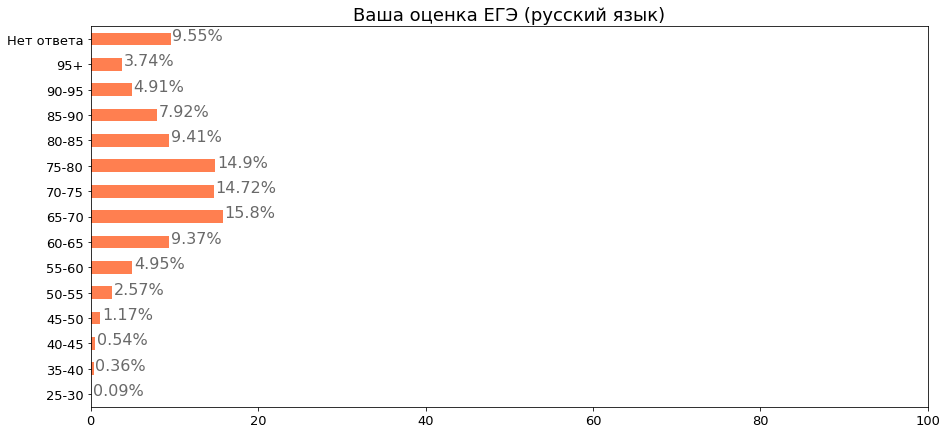

,Ваша оценка ЕГЭ (русский язык)
25-30,0.09
35-40,0.36
40-45,0.54
45-50,1.17
50-55,2.57
55-60,4.95
60-65,9.37
65-70,15.80
70-75,14.72
75-80,14.90


47 Степ
count     247.0
unique     80.0
top        36.0
freq       10.0
Name: DemStEGEphysics, dtype: float64
Рендж дата DemStEGEphysics


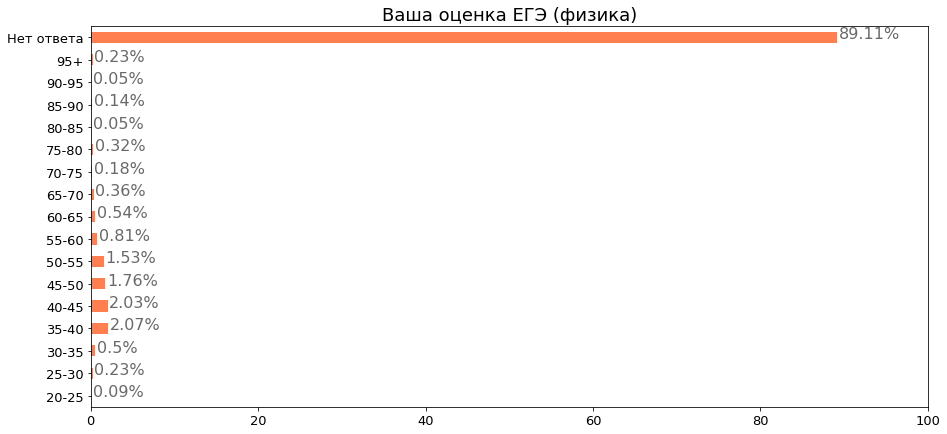

,Ваша оценка ЕГЭ (физика)
20-25,0.09
25-30,0.23
30-35,0.50
35-40,2.07
40-45,2.03
45-50,1.76
50-55,1.53
55-60,0.81
60-65,0.54
65-70,0.36


49 Степ
count     147.0
unique     77.0
top        20.0
freq        6.0
Name: DemStEGEchemistry, dtype: float64
Рендж дата DemStEGEchemistry


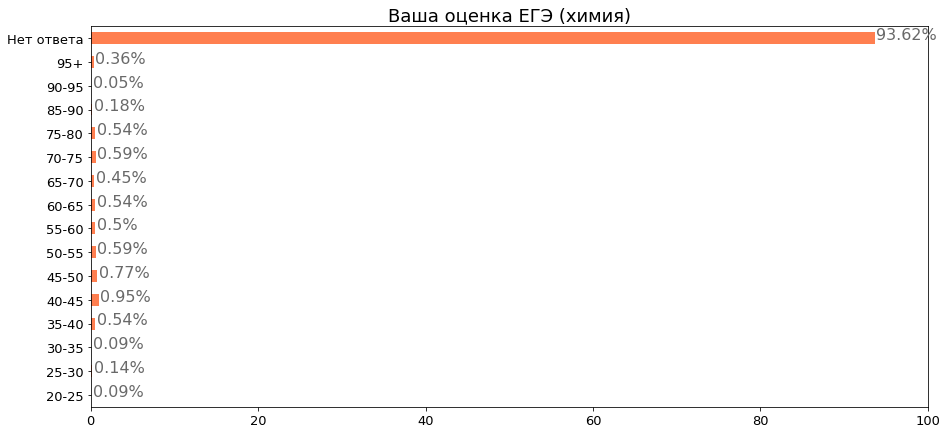

,Ваша оценка ЕГЭ (химия)
20-25,0.09
25-30,0.14
30-35,0.09
35-40,0.54
40-45,0.95
45-50,0.77
50-55,0.59
55-60,0.50
60-65,0.54
65-70,0.45


48 Степ
count     323.0
unique     68.0
top        50.0
freq       15.0
Name: DemStEGEbiology, dtype: float64
Рендж дата DemStEGEbiology


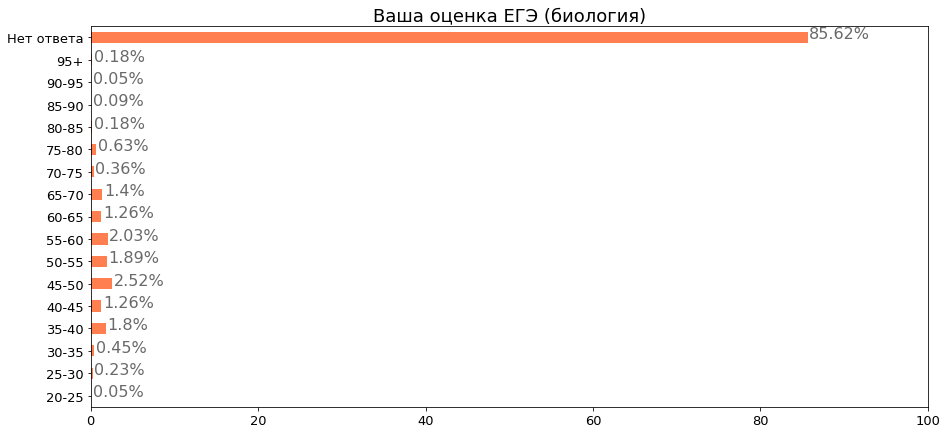

,Ваша оценка ЕГЭ (биология)
20-25,0.05
25-30,0.23
30-35,0.45
35-40,1.80
40-45,1.26
45-50,2.52
50-55,1.89
55-60,2.03
60-65,1.26
65-70,1.40


49 Степ
count     249
unique     94
top        84
freq       10
Name: DemStEGEcomputerScience, dtype: object


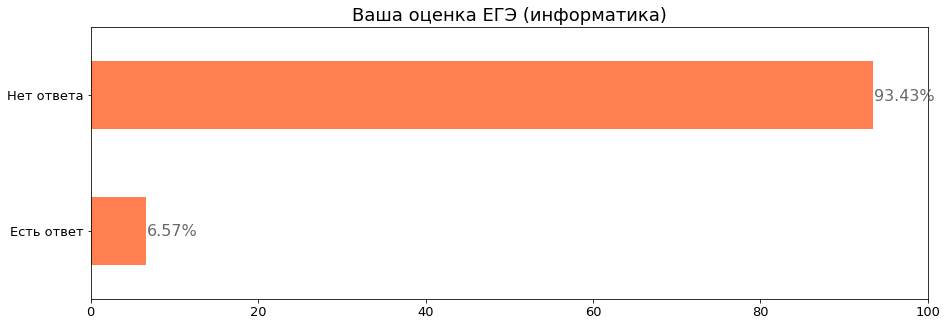

,Ваша оценка ЕГЭ (информатика)
Есть ответ,6.57
Нет ответа,93.43


34 Степ


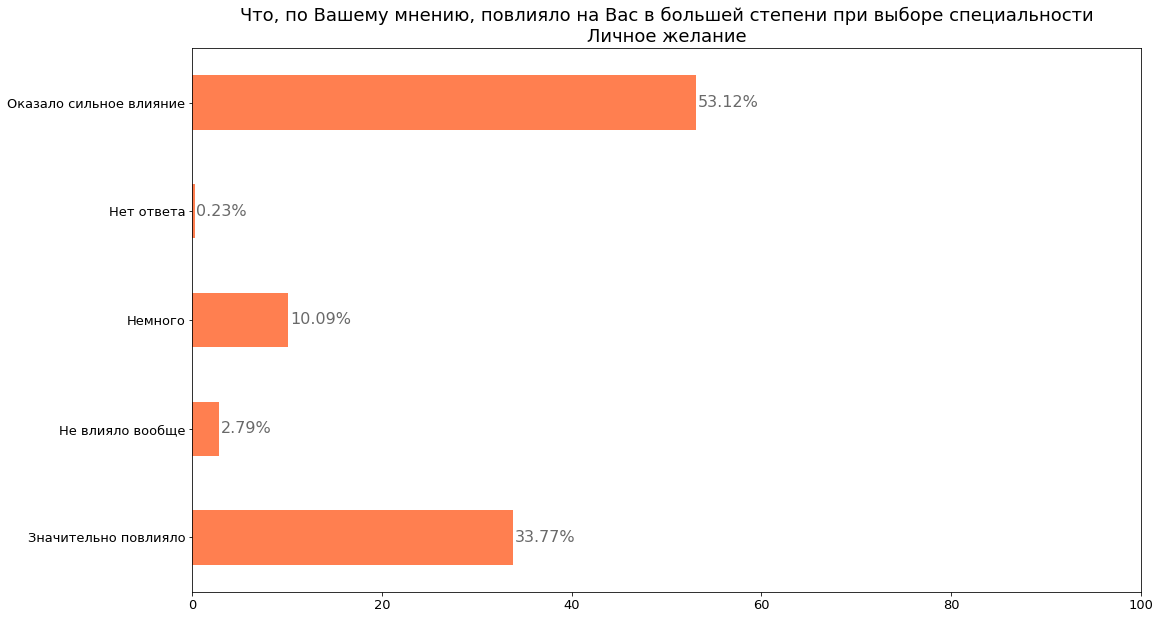

37 Степ


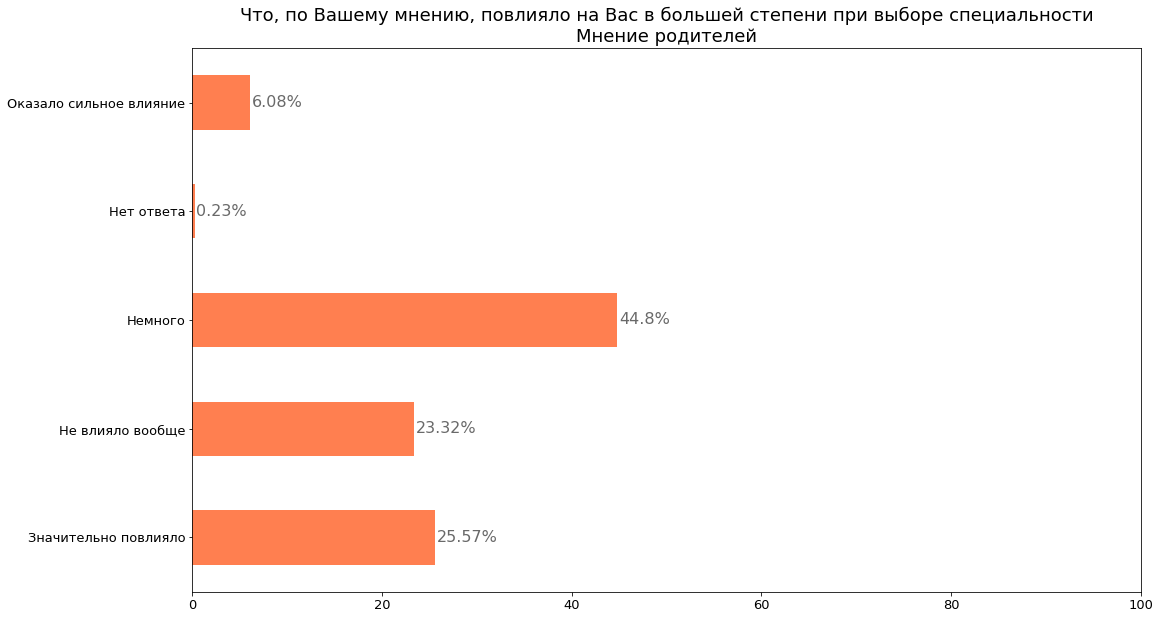

37 Степ


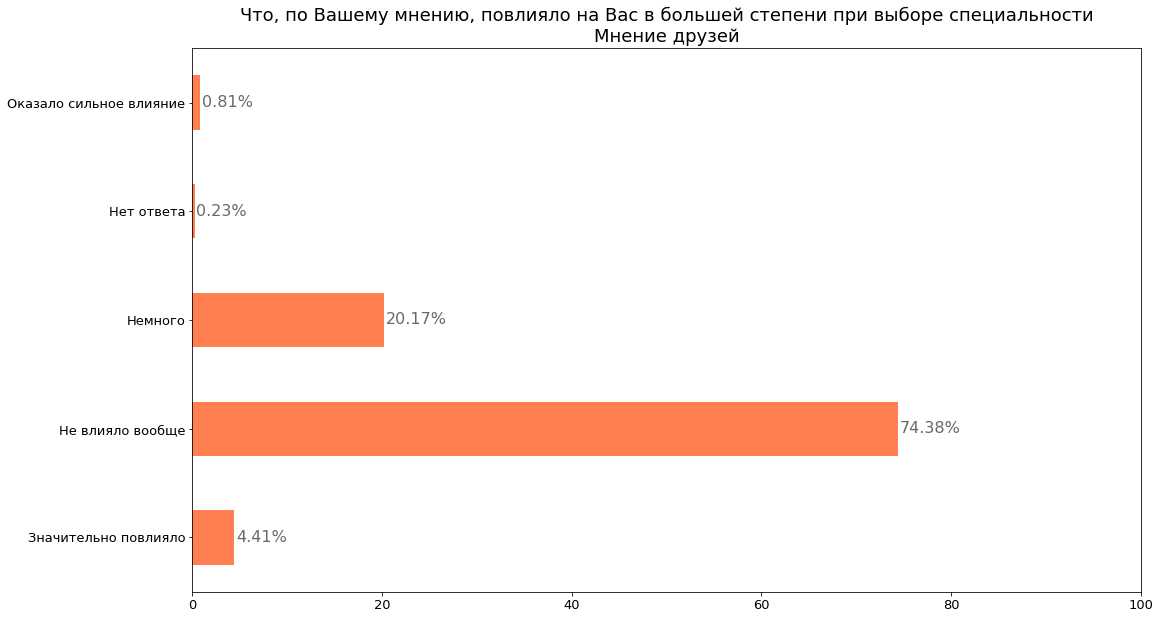

37 Степ


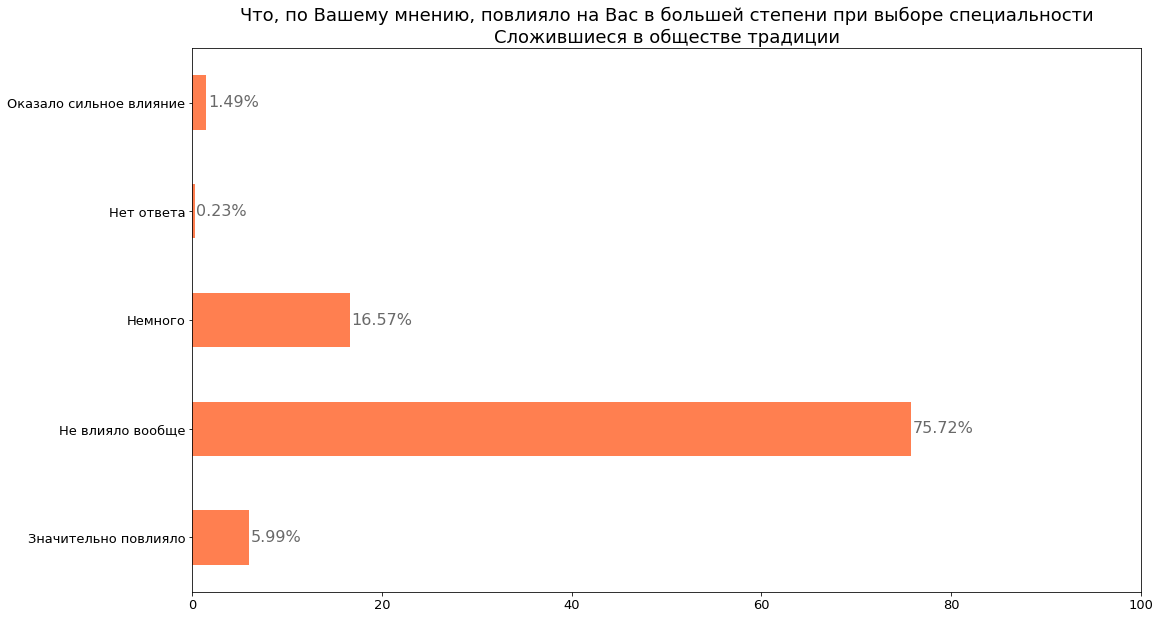

37 Степ


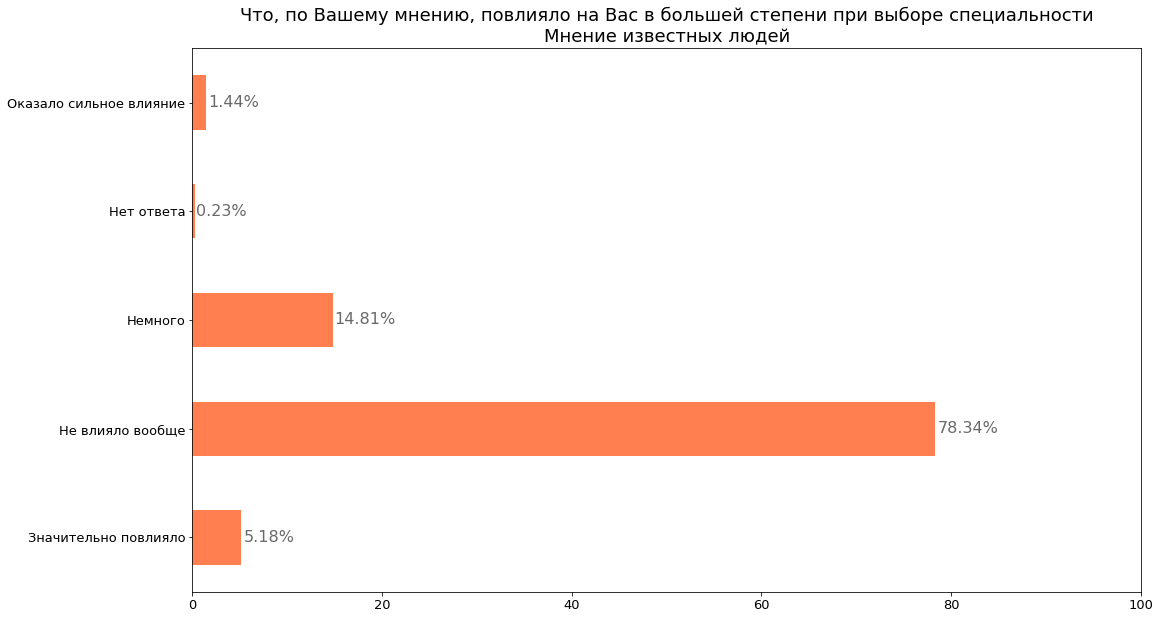

37 Степ


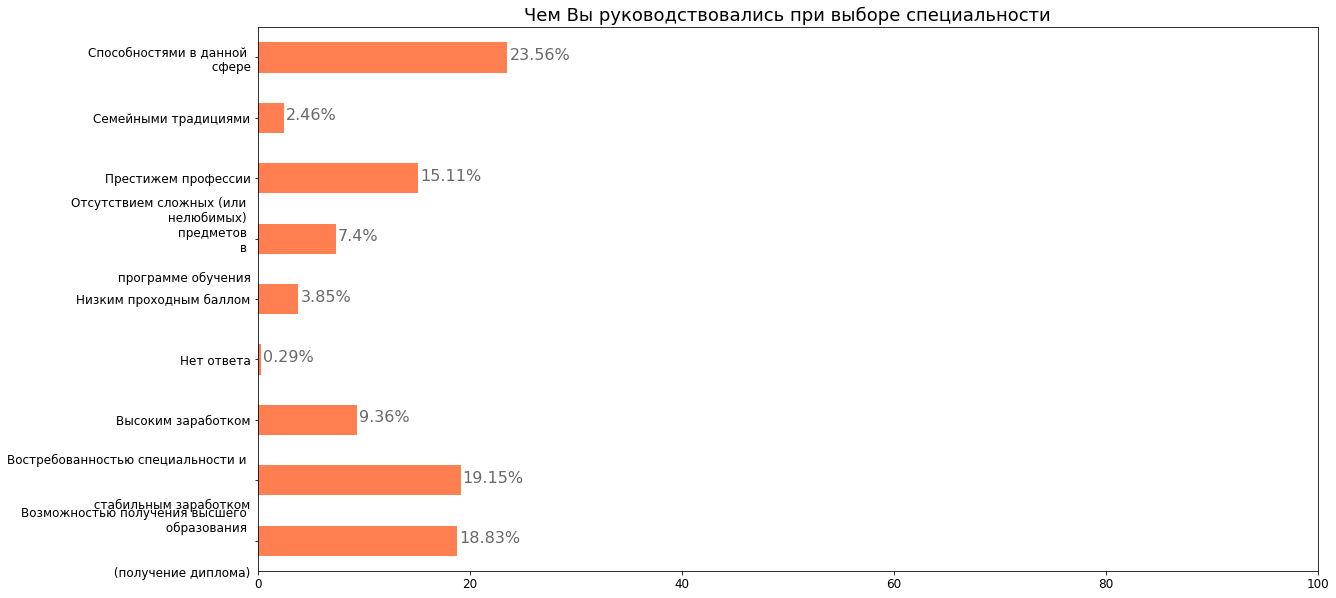

41 Степ


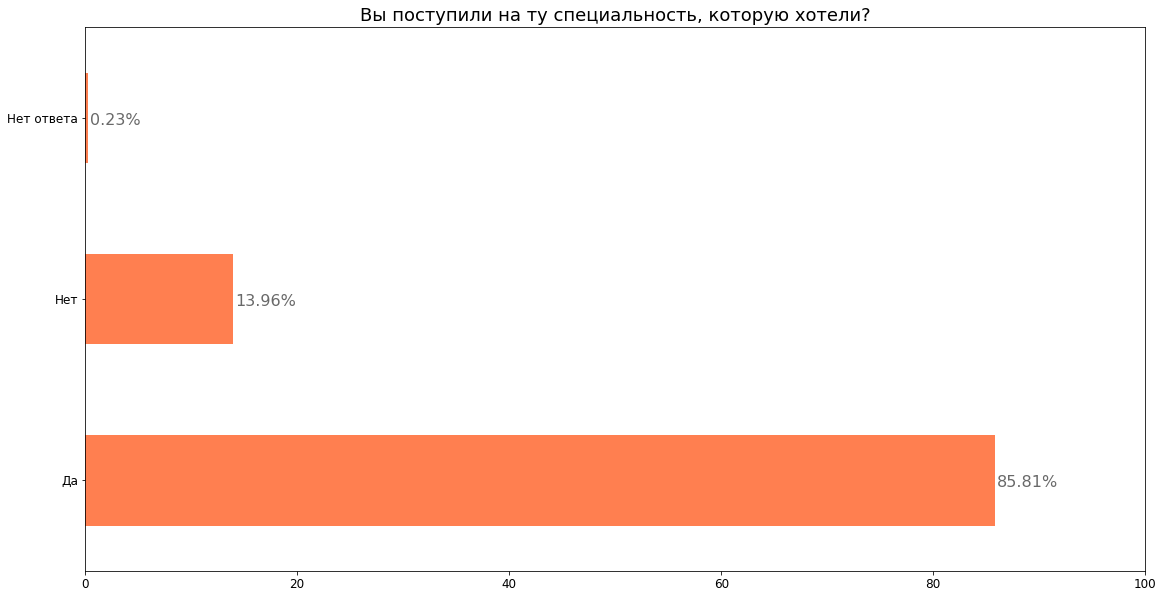

35 Степ
Студенты/«Кабардино-Балкарский государственный университет им. Х.М. Бербекова».csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning:

Columns (10,11,16,17,18,23,24,25,30,36,37,38,43,44,45,50,51,52,57,63,64,65,70,71,72,77,78,79,84,85,86,91,92,93,98,104,105,106,111,112,117,118,123,124,129,130,135,136,141,142,147,148,153,154,155,160,161,162,167,168,169,174,175,176,181,182,183,188,196,197,202,208,209,210,215,216,217,222,223,224,229,230,231,236,237,238,243,244,245,250,251,252,257,258,259,264,265,266,271,272,273,278,279,280,285,286,287,292,293,294,299,300,301,306,307,308,313,314,315,320,321,322,327,328,329,334,335,336,341,342,343,348,349,350,355,356,357,362,363,364,369,370,371,376,377,378,383,384,385,390,391,392,397,398,399,404,405,406,411,412,413,418,419,420,425,426,427,432,433,434,439,440,441,446,447,448,453,454,455,460,461,462,467,468,469,474,475,476,481,482,483,488,489,490,495,496,497,502,503,504,509,510,511,516,517,518,523,524,525,530,531,532,537,538,539,544,545,546,551,552,553,558,559,560,565,566,567,572,573,574,579,580,581,5

Загружен датасет - «Кабардино-Балкарский государственный университет им. Х.М. Бербекова».csv 
 Размер составляет (716, 58)
    DemStAge  ... DemStCareerTrueChoice.totalTime
1         18  ...                          91.706
2         17  ...                          88.131
3         17  ...                          49.839
4         17  ...                          46.259
5         17  ...                          53.985
..       ...  ...                             ...
712       19  ...                         116.046
713       18  ...                          88.827
714       18  ...                         155.574
715       17  ...                         125.926
716       20  ...                         138.587

[716 rows x 58 columns]
count     695.0
unique     23.0
top        18.0
freq      160.0
Name: DemStAge, dtype: float64
Рендж дата DemStAge


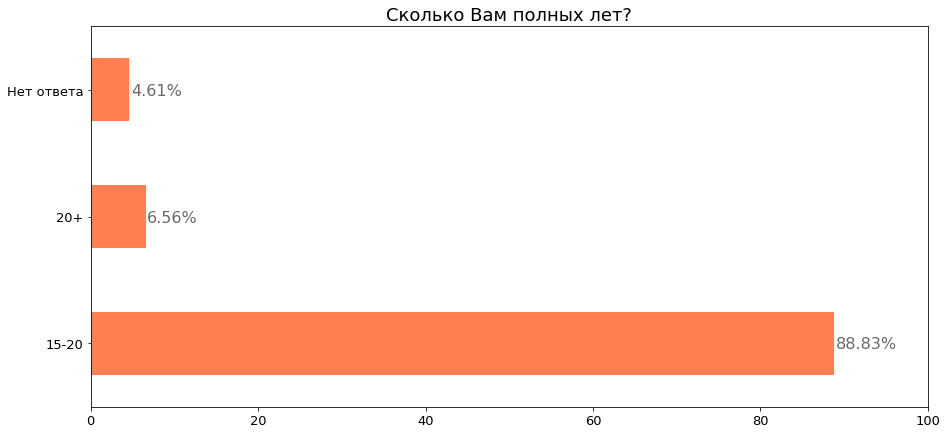

,Сколько Вам полных лет?
15-20,88.83
20+,6.56
Нет ответа,4.61


64 Степ


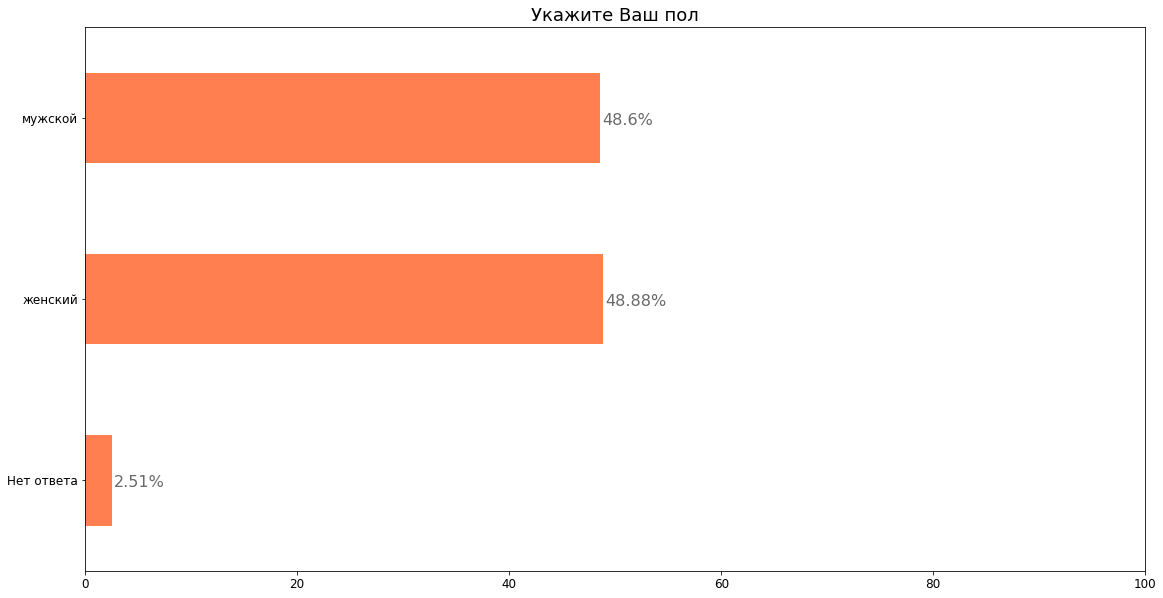

64 Степ


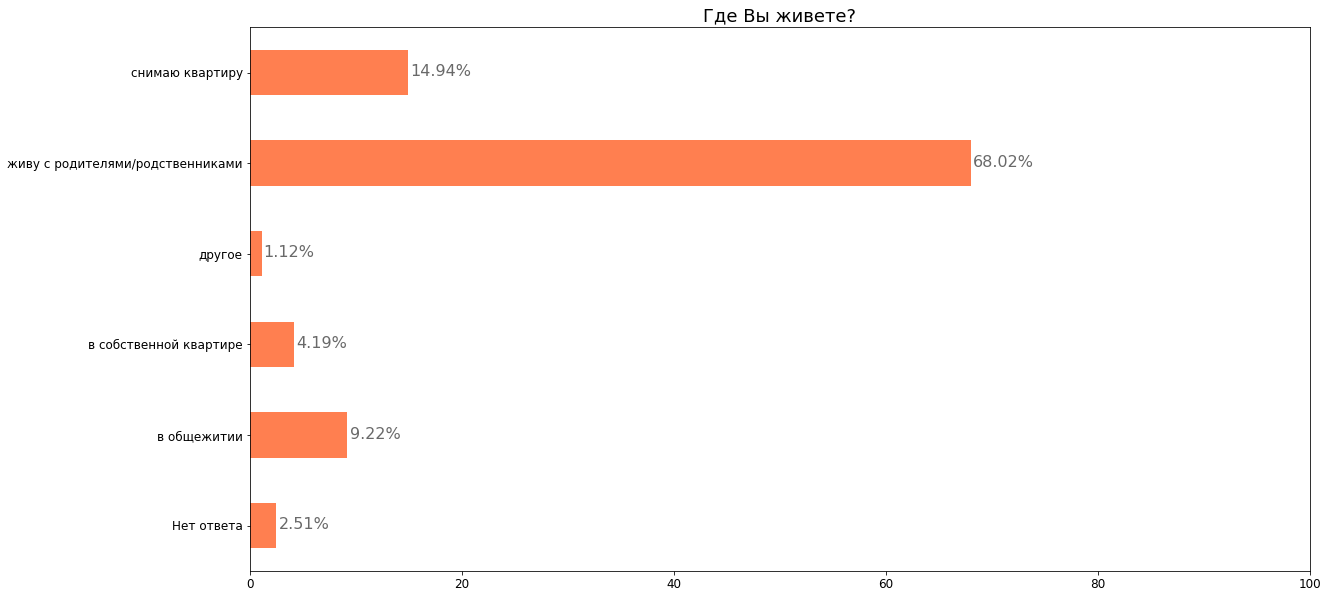

70 Степ
count           17
unique          15
top       Общежите
freq             2
Name: DemStAccomodationStatus2, dtype: object


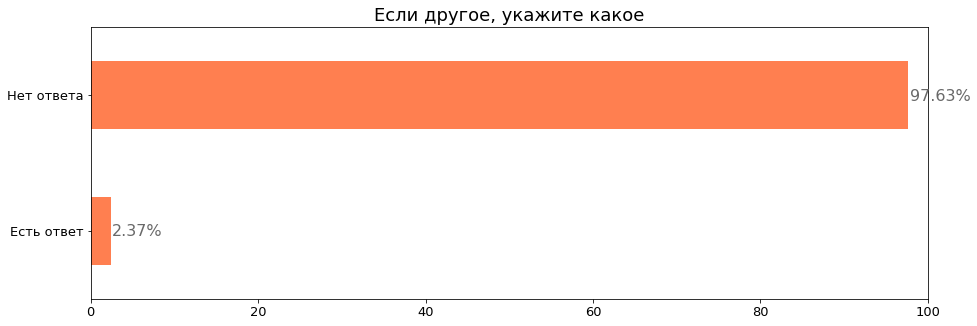

,"Если другое, укажите какое"
Есть ответ,2.37
Нет ответа,97.63


62 Степ


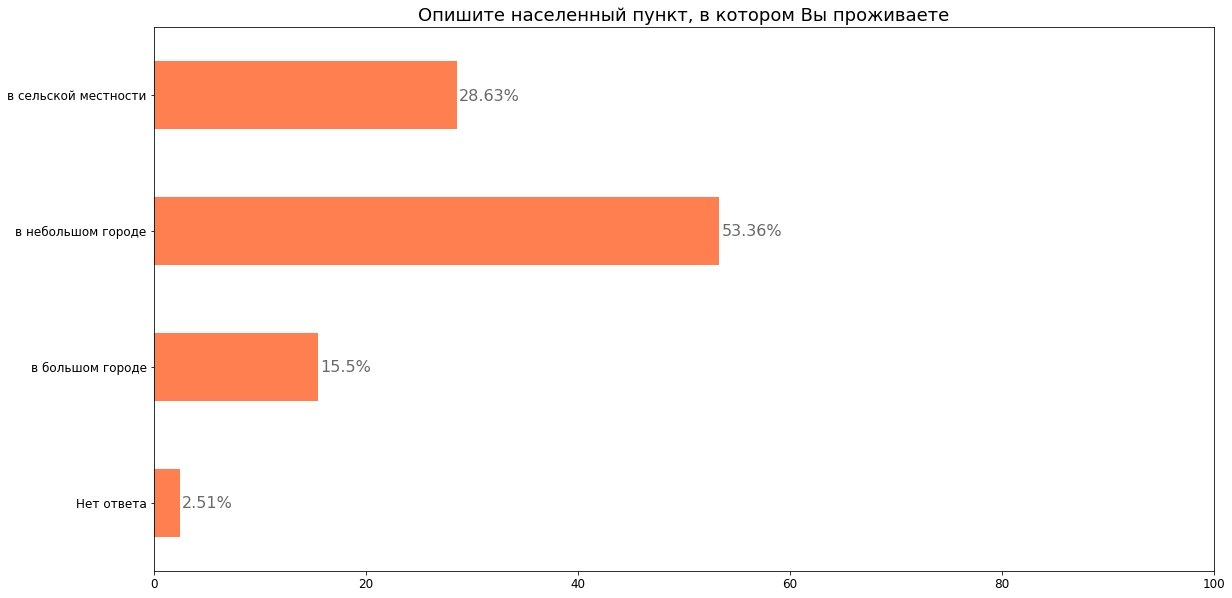

66 Степ


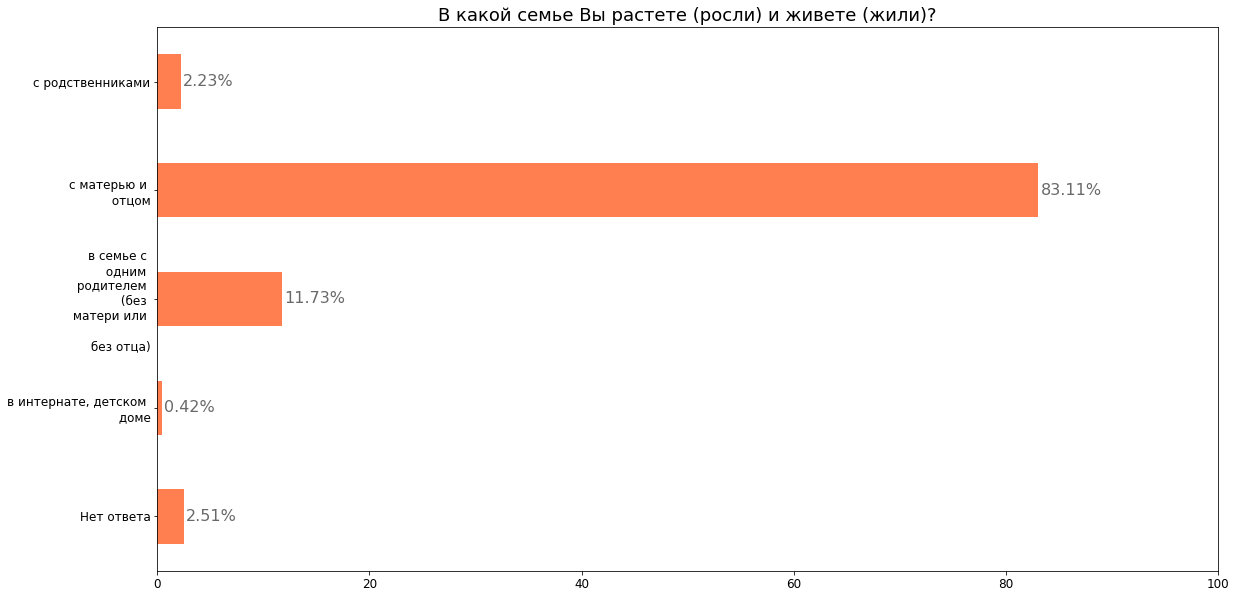

68 Степ


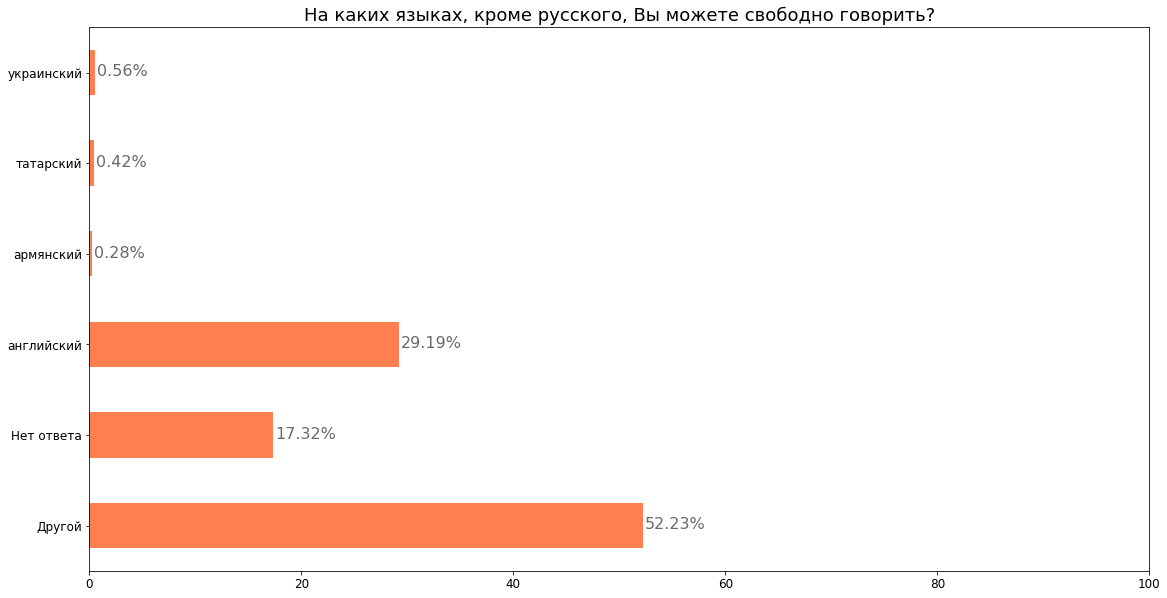

70 Степ
count              417
unique              77
top       кабардинский
freq               137
Name: DemStLangMainOther, dtype: object


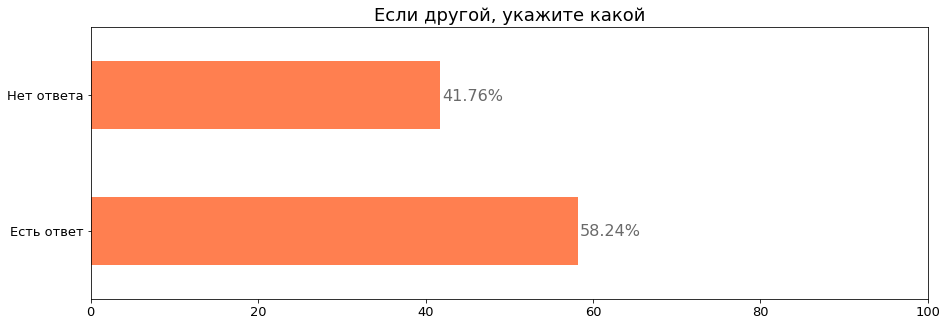

,"Если другой, укажите какой"
Есть ответ,58.24
Нет ответа,41.76


62 Степ


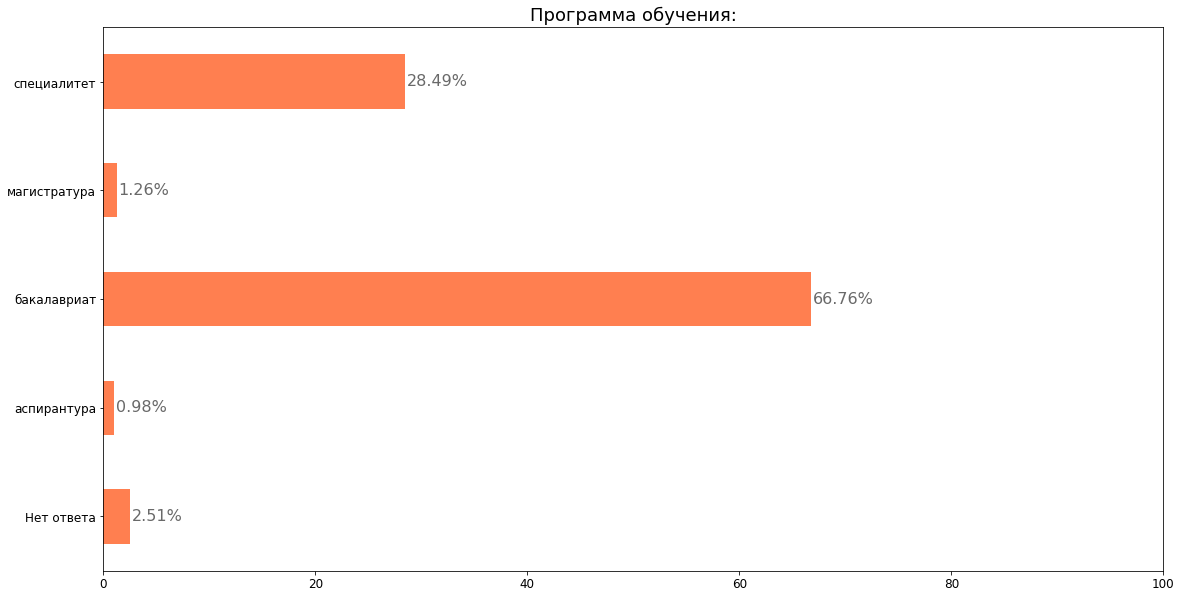

68 Степ


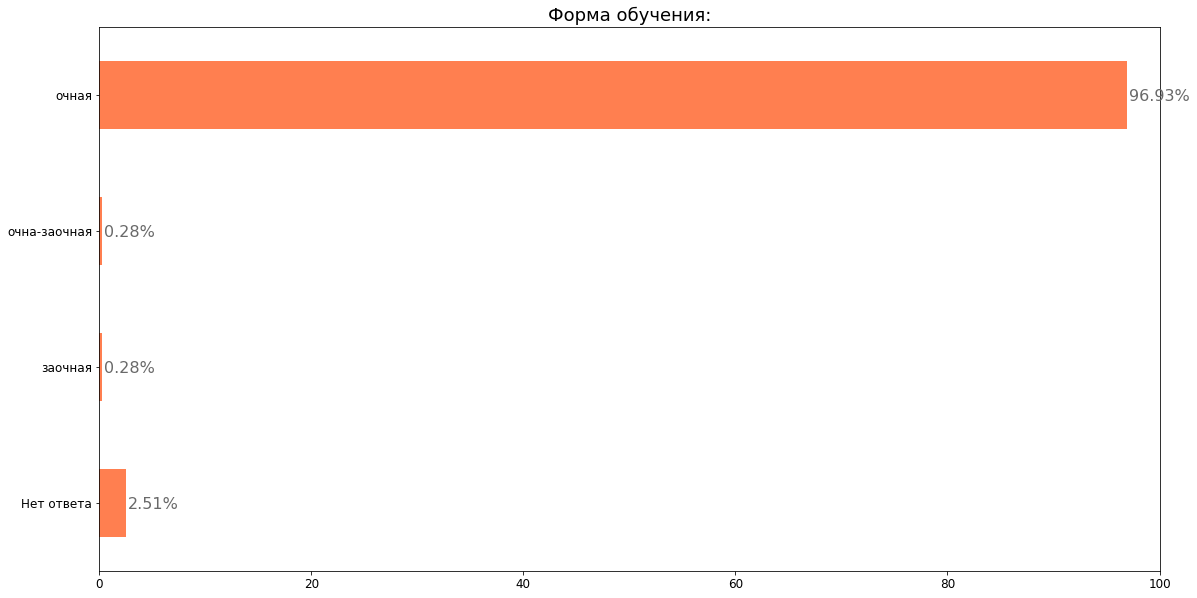

66 Степ


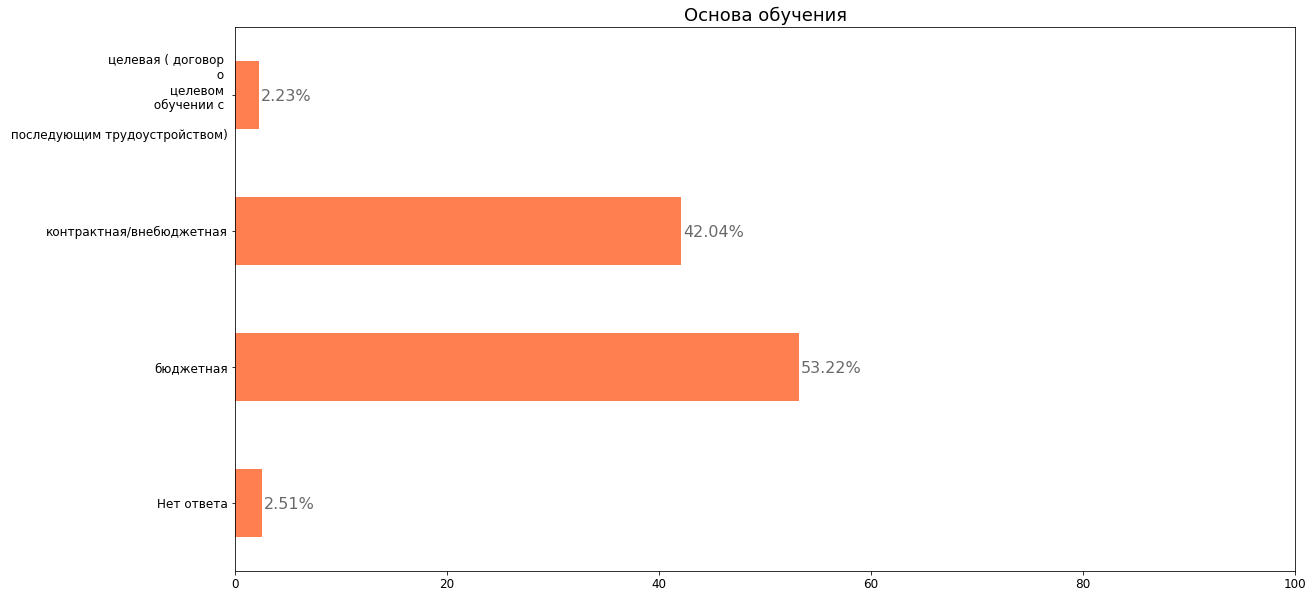

66 Степ


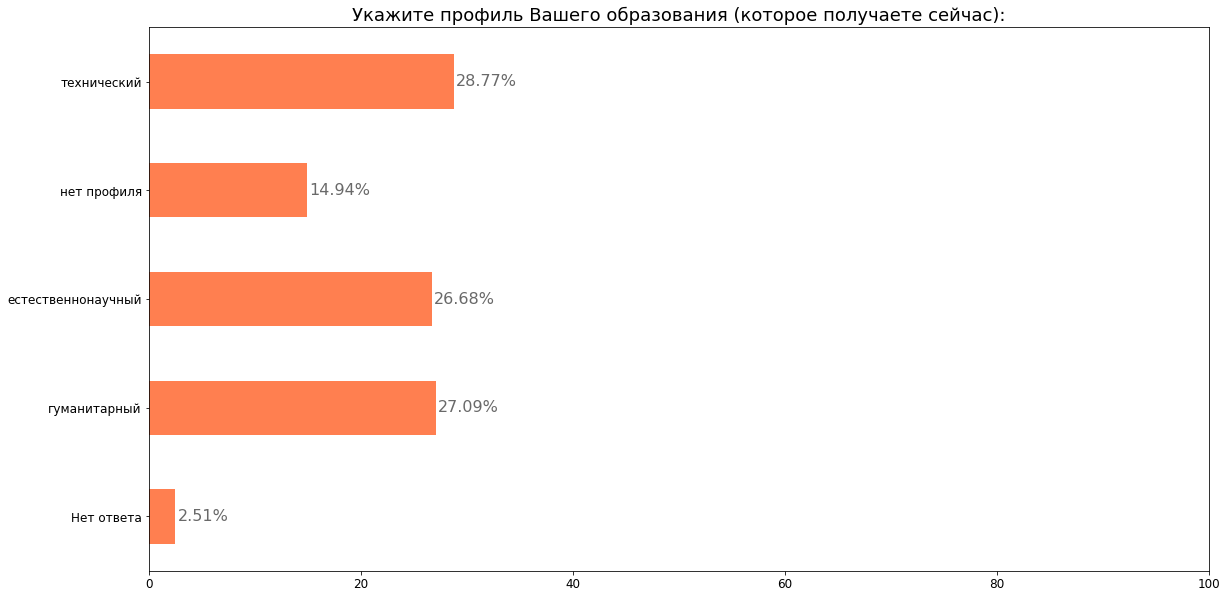

68 Степ


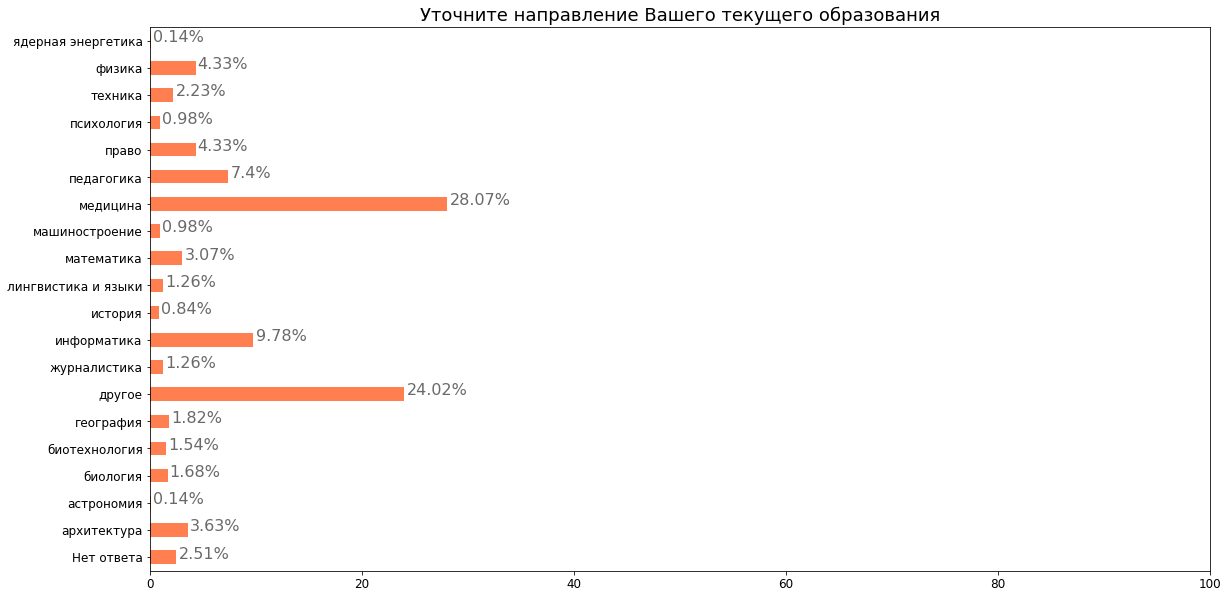

98 Степ
count                  227
unique                  66
top       Программирование
freq                    19
Name: DemStLangMain2, dtype: object


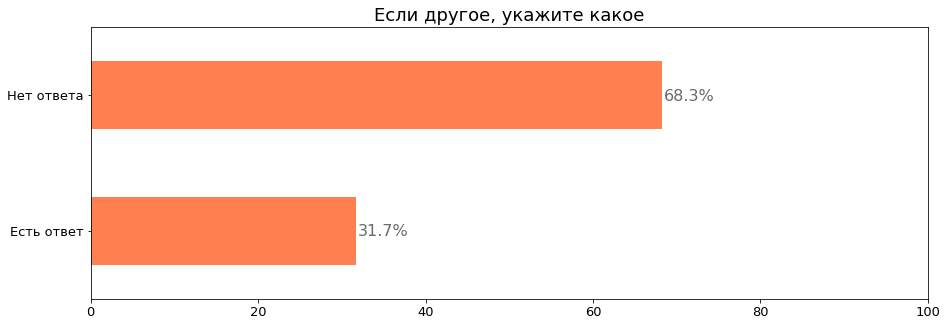

,"Если другое, укажите какое"
Есть ответ,31.7
Нет ответа,68.3


62 Степ


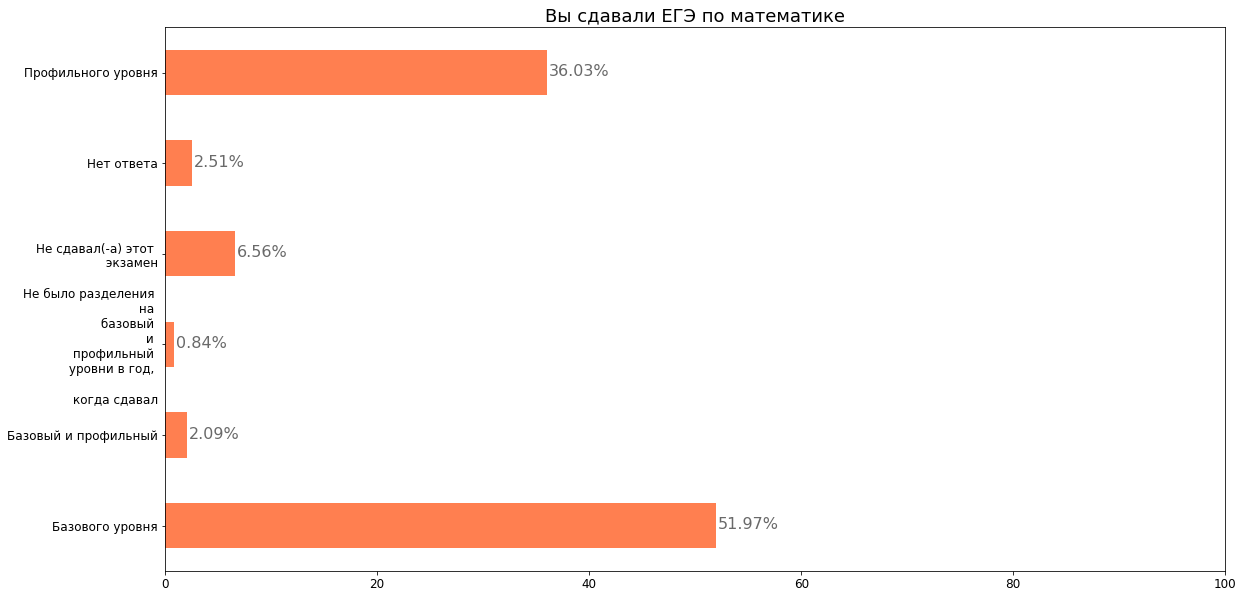

70 Степ
count     319
unique     60
top        20
freq      102
Name: DemStEGEMathBase, dtype: object


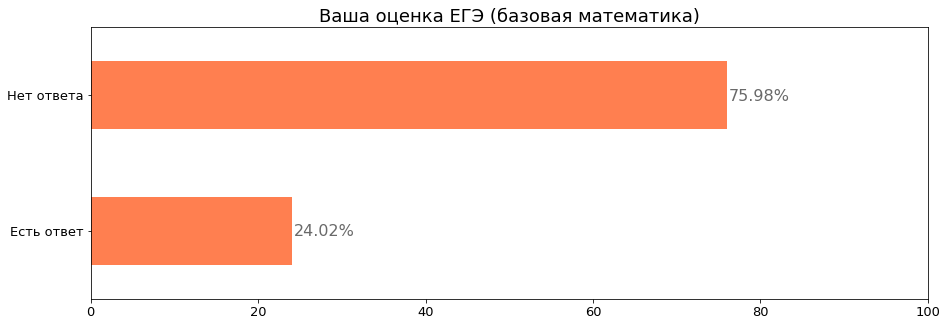

,Ваша оценка ЕГЭ (базовая математика)
Есть ответ,24.02
Нет ответа,75.98


62 Степ
count     279.0
unique     75.0
top        50.0
freq       25.0
Name: DemStEGEMathProfile, dtype: float64
Рендж дата DemStEGEMathProfile


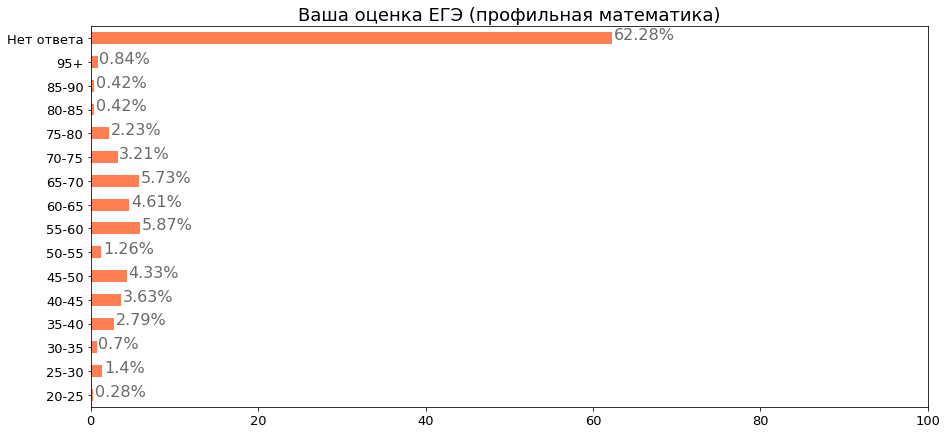

,Ваша оценка ЕГЭ (профильная математика)
20-25,0.28
25-30,1.40
30-35,0.70
35-40,2.79
40-45,3.63
45-50,4.33
50-55,1.26
55-60,5.87
60-65,4.61
65-70,5.73


90 Степ
count     549.0
unique    104.0
top        60.0
freq       23.0
Name: DemStEGErussian, dtype: float64
Рендж дата DemStEGErussian


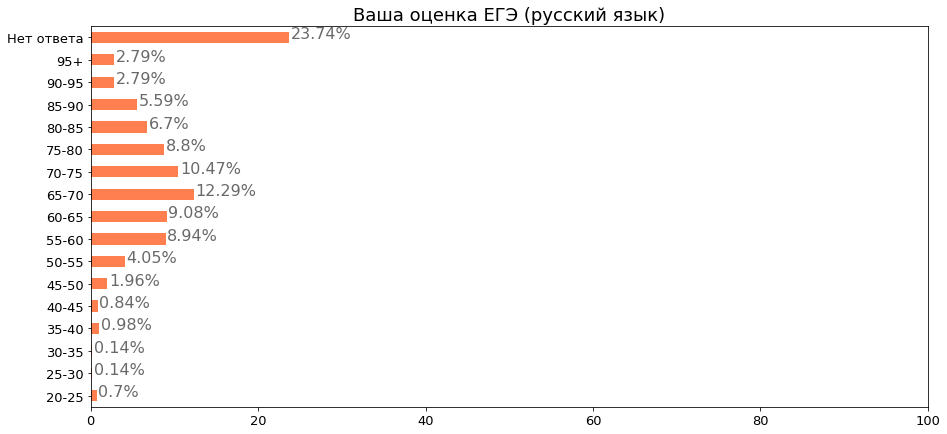

,Ваша оценка ЕГЭ (русский язык)
20-25,0.70
25-30,0.14
30-35,0.14
35-40,0.98
40-45,0.84
45-50,1.96
50-55,4.05
55-60,8.94
60-65,9.08
65-70,12.29


92 Степ
count     159.0
unique     52.0
top        45.0
freq       11.0
Name: DemStEGEphysics, dtype: float64
Рендж дата DemStEGEphysics


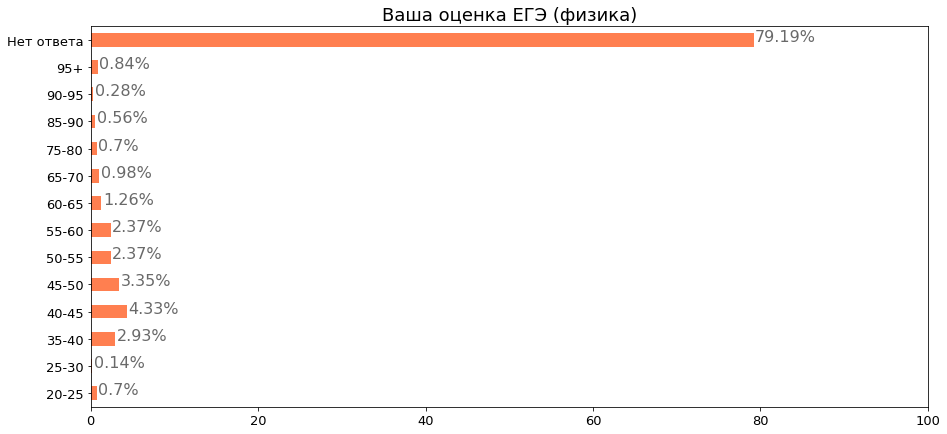

,Ваша оценка ЕГЭ (физика)
20-25,0.70
25-30,0.14
35-40,2.93
40-45,4.33
45-50,3.35
50-55,2.37
55-60,2.37
60-65,1.26
65-70,0.98
75-80,0.70


86 Степ
count     213.0
unique     89.0
top        58.0
freq        7.0
Name: DemStEGEchemistry, dtype: float64
Рендж дата DemStEGEchemistry


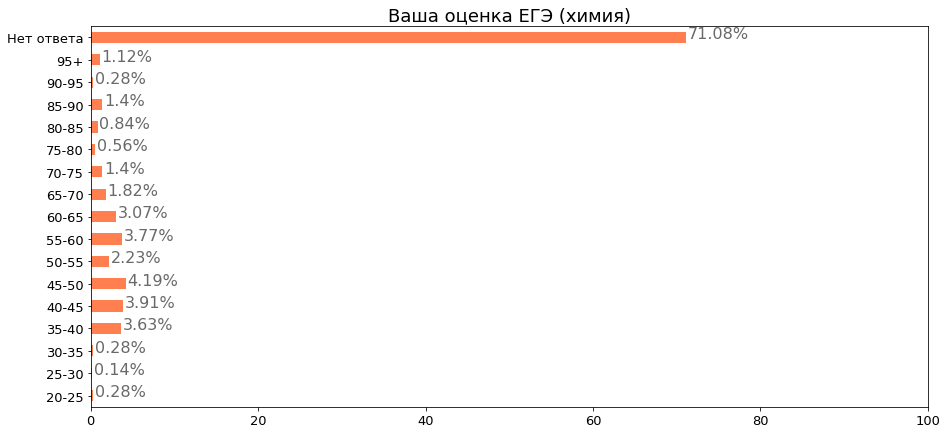

,Ваша оценка ЕГЭ (химия)
20-25,0.28
25-30,0.14
30-35,0.28
35-40,3.63
40-45,3.91
45-50,4.19
50-55,2.23
55-60,3.77
60-65,3.07
65-70,1.82


92 Степ
count     232
unique    101
top        53
freq        7
Name: DemStEGEbiology, dtype: object


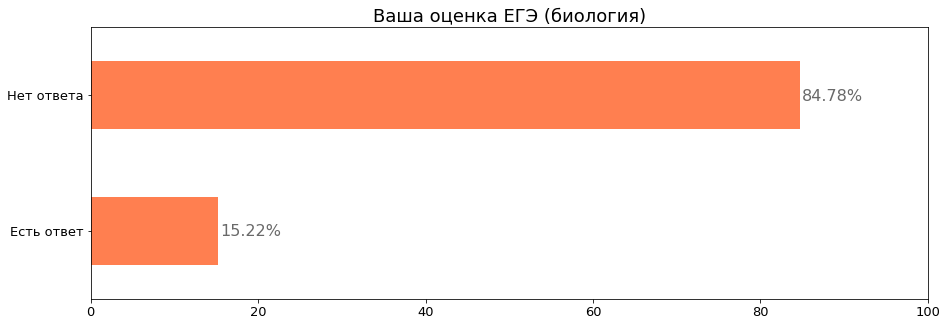

,Ваша оценка ЕГЭ (биология)
Есть ответ,15.22
Нет ответа,84.78


62 Степ
count     58
unique    36
top       20
freq       5
Name: DemStEGEcomputerScience, dtype: object


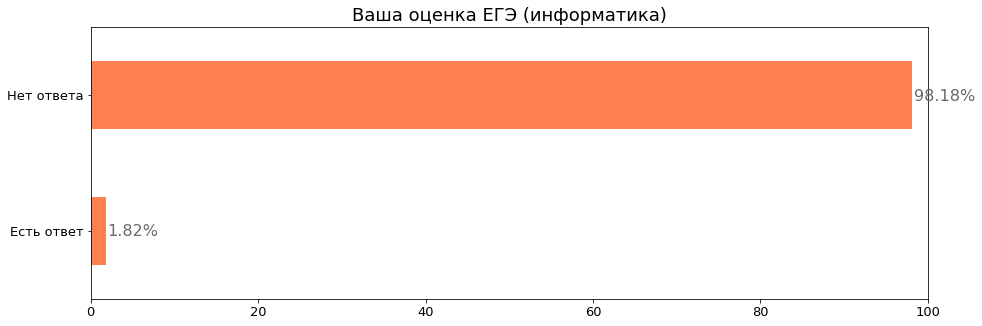

,Ваша оценка ЕГЭ (информатика)
Есть ответ,1.82
Нет ответа,98.18


62 Степ


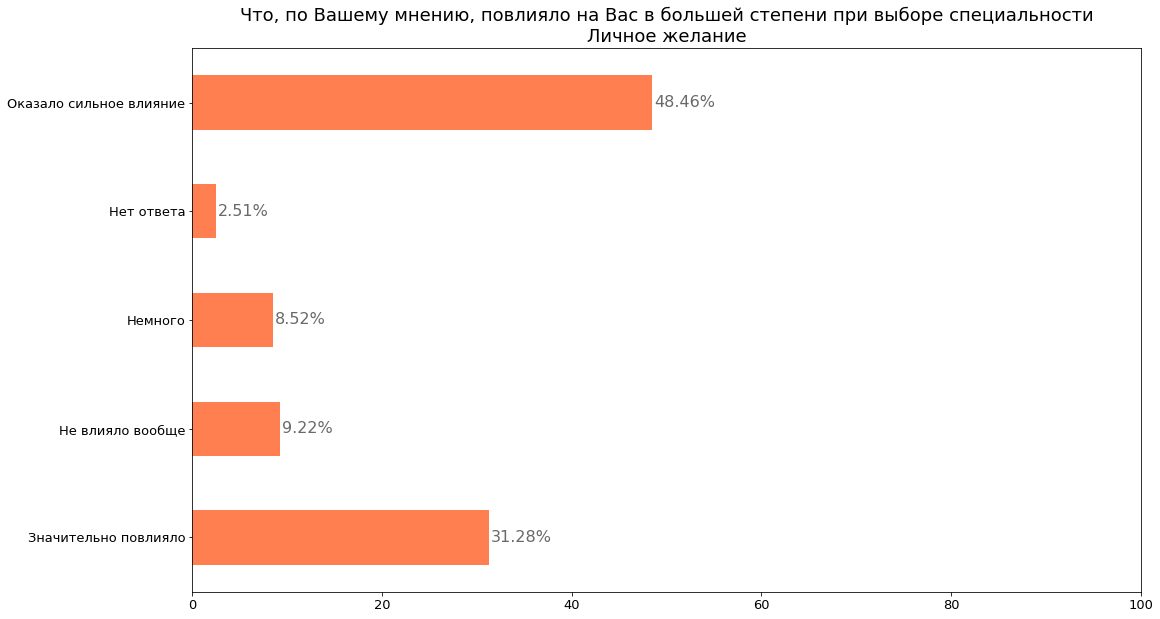

68 Степ


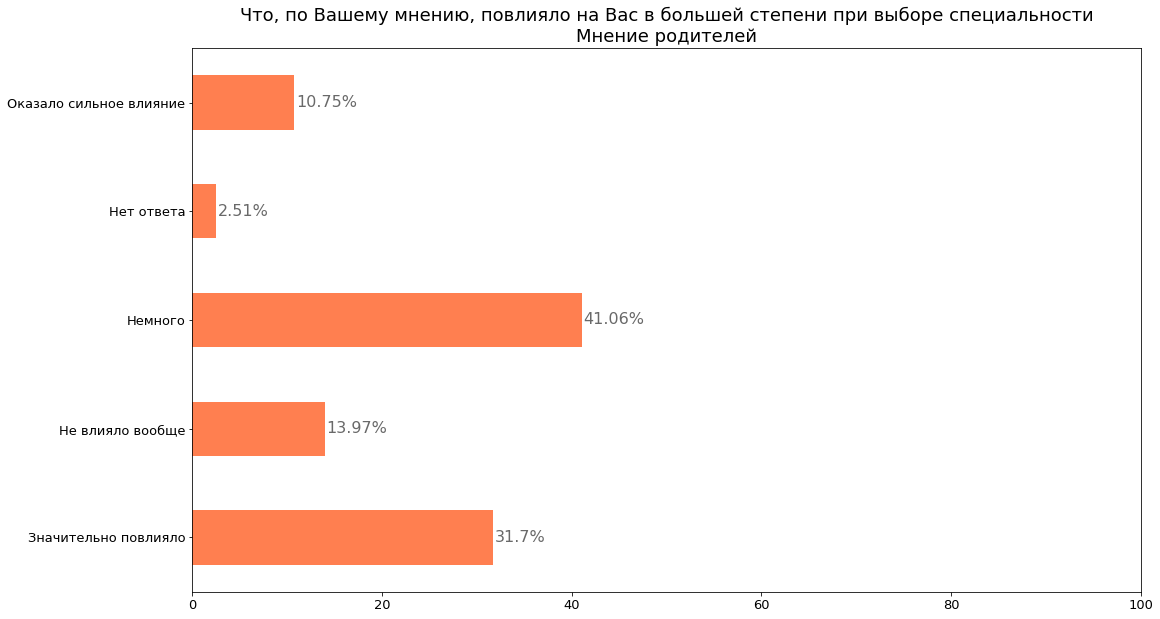

68 Степ


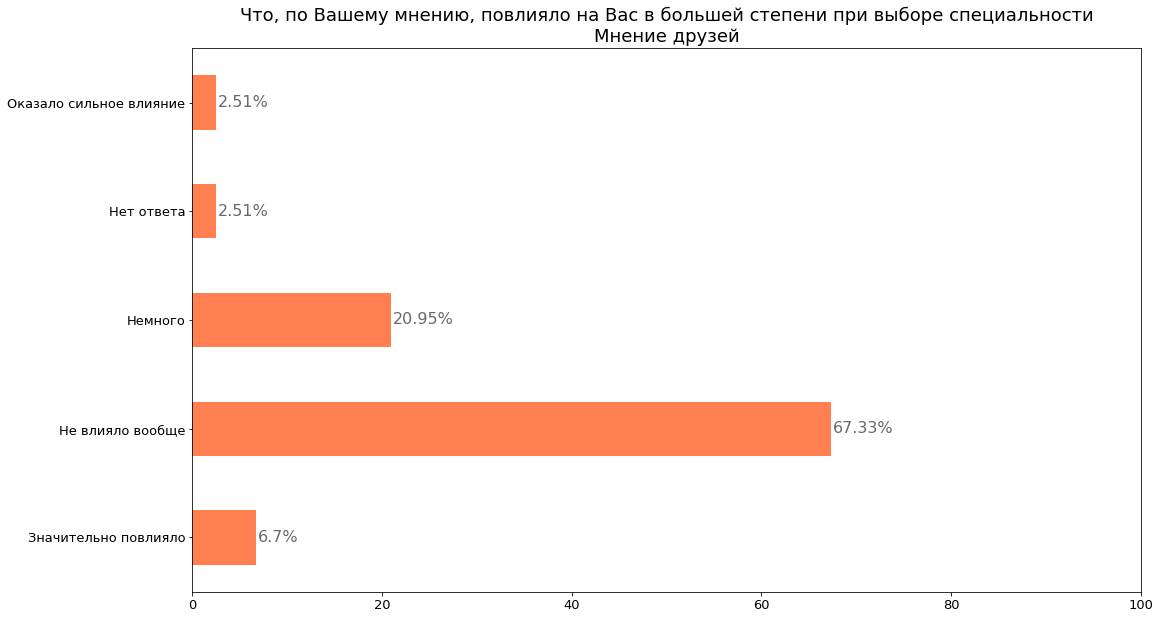

68 Степ


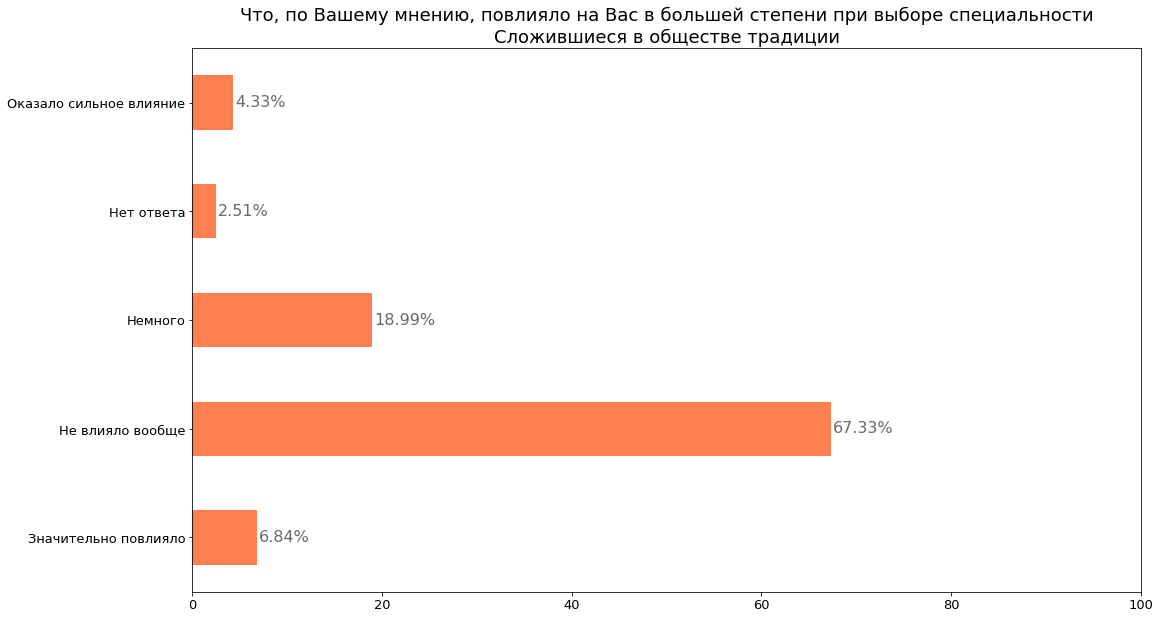

68 Степ


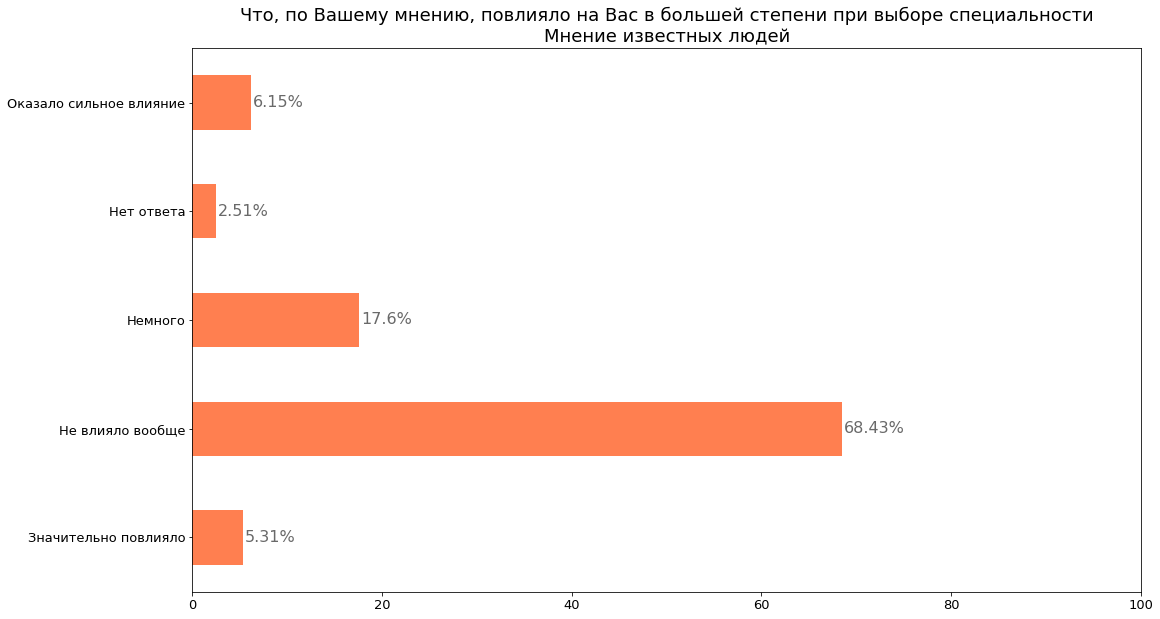

68 Степ


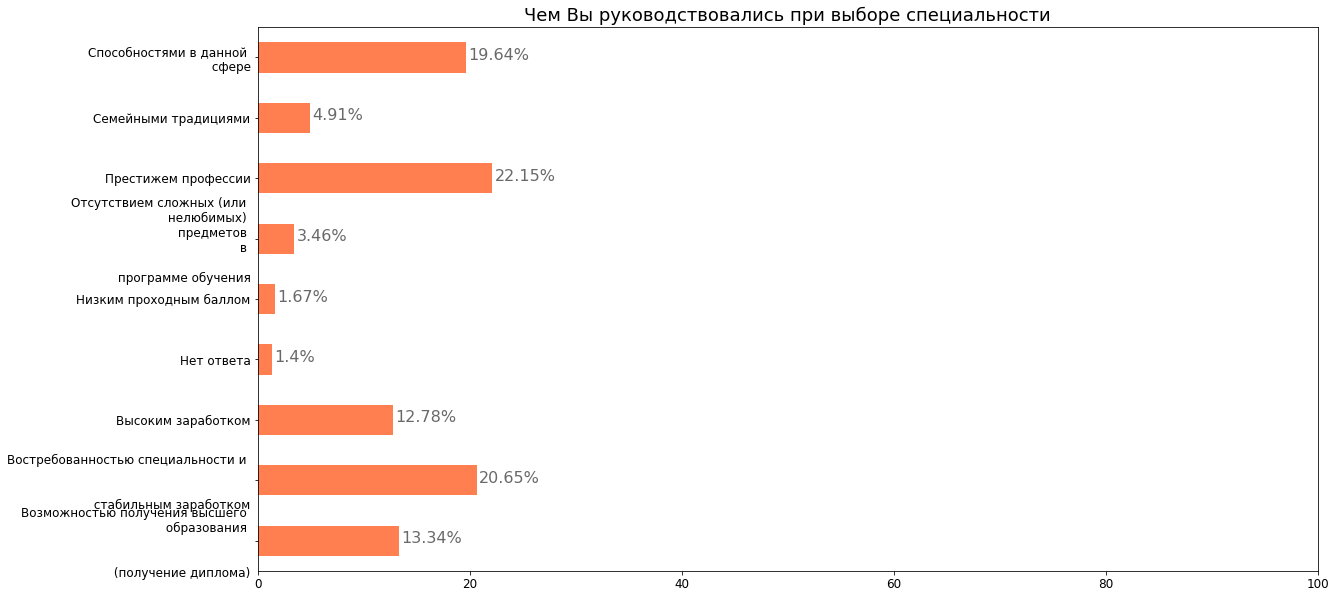

76 Степ


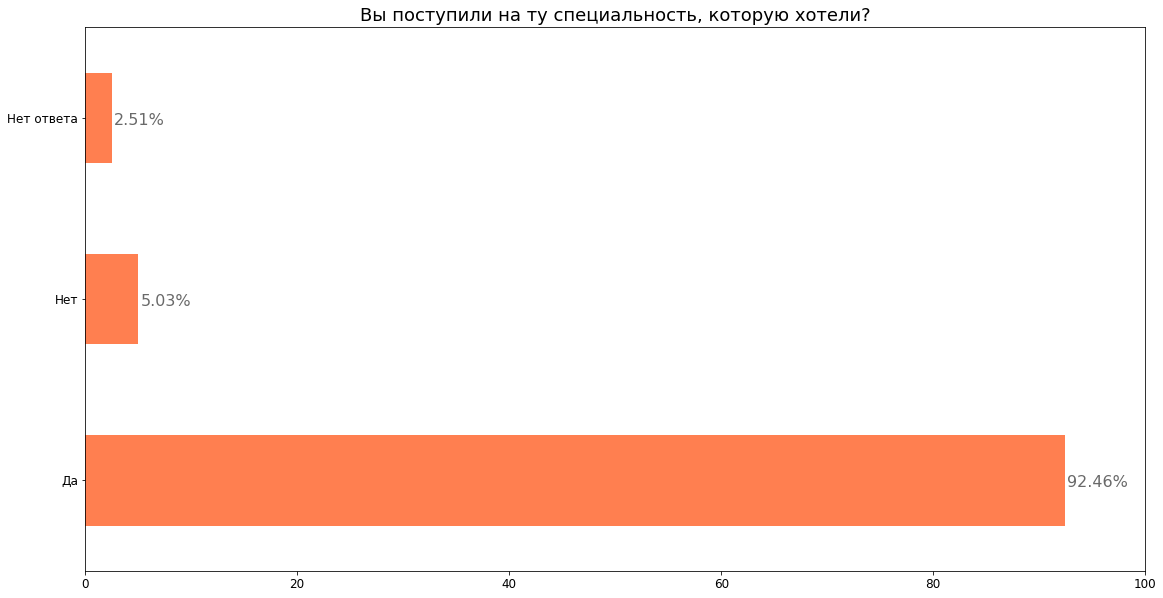

64 Степ
Cохраняется execel


In [0]:
path = r'Студенты/'
paths = os.listdir(path)
out = r'Demst/'
test = 'Demst'
yamls = ['DemSt','Anketa2S30','MyVOC','MTQ','Stereotype','SDQ','rcbs']
quest = get_yaml(r'dictionary_DemSt.yml')
# if not os.path.isdir(out):
#   print('Создана папка ',out)
#   os.mkdir(out)
writer = pd.ExcelWriter(test, engine='xlsxwriter')
for index, name in enumerate(paths[:3]):
  try:
    name_path = os.path.join(path, name)
    create_execel(name_path,'DemSt',out,index,'DemSt', text1=name.split('.')[0], space=6,num=33)
  except FileNotFoundError:
    print(name, 'Ошибка')
print('Cохраняется execel')
writer.save() 

In [0]:
display(HTML("""
<style>
.output_image>img {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
def create_execel(name, test, out, yamls):
  print(name)
  global title
  # name = r'«Московский педагогический государственный  университет».csv'
  psycho = pd.read_csv(name, sep=',', error_bad_lines=False)
  psycho = psycho.rename(columns=psycho.iloc[0])
  psycho = psycho.iloc[1:]
  psycho = psycho.dropna(thresh=6)
  name = os.path.split(name)[-1]
  name = os.path.join(out,test+ '_' + name.split('.')[0])
  writer = pd.ExcelWriter(name, engine='xlsxwriter')
  data = data_remove_filter(psycho, yamls)
  print(data)
  data.head(10)
  def exel_manipulation(result, sheet_name, cell_image='C8',size=40, scale=0.7):
    result.to_excel(writer, sheet_name=sheet_name[:31])
    worksheet = writer.sheets[sheet_name[:31]]
    worksheet.set_column('A:A', size)
    worksheet.set_column('B:B', size)
    worksheet.insert_image(cell_image, r'images/{}.png'.format(sheet_name), {'x_offset': 15, 'y_offset': 10, 'x_scale': scale, 'y_scale': scale})

  def range_table(data, i,max_temp_age=25, max_temp_all=100):
    describe = data.describe()
    print(describe)
    title = item['Вопрос']
    print(title, describe.dtype)
    if 'float64' == describe.dtype or 'Age' in i:
      print('Рендж дата', i)
      print(data)
      data_sort = data.astype(float)
      display(HTML('<h1>{}</h1>'.format(title)))
      try:
        if 'Age' in i:
          bins, labels = create_range(data_sort, max_temp=max_temp_age)
        else:
          bins, labels = create_range(data_sort, max_temp=max_temp_all)
        data_replace = pd.cut(data_sort, bins=bins, labels=labels)
        data_replace=data_replace.replace(np.nan, 'Нет ответа', regex=True)
      except Exception as e:
        data_replace=data_sort.replace(np.nan, 'Нет ответа', regex=True)
      

      table = variant_answer(data_replace, title_up=title, fontsize_plot=10,figsize=(17,10),name=i)
      table.columns = [title]
      display(table)
      # df['stage'] = pd.cut(df.age, bins=[0,11,16,21,300], labels=[1,2,3,4])
    else:
      display(HTML('<h1>{}</h1>'.format(title)))
      data_replace=data.apply(lambda s: 'Есть ответ' if isinstance(s,str) else 'Нет ответа')
      table = variant_answer(data_replace, title_up=title, fontsize_plot=10,figsize=(15,5),name=i)
      table.columns = [title]
      display(table)
    return table

  temp = ''
  for i in data.columns[:]:
    # if 'totalTime' in i and 'DemStCareerValue' not in i:
    #   title = 'Затраченное время на вопрос'
    #   print(i)
    #   data_sort = data[i].astype(float)
    #   describe = data_sort.describe()
    #   display(HTML('<h1>{}</h1>'.format(title)))
    #   try:
    #     bins, labels = create_range(data_sort, max_temp=100)
    #     data_replace = pd.cut(data_sort, bins=bins, labels=labels)
    #     data_replace=data_replace.replace(np.nan, 'Нет ответа', regex=True)
  

    #     table = variant_answer(data_replace, title_up=title, fontsize_plot=10,figsize=(17,10),name=i)
    #     table.columns = [title]
    #     # table = pd.concat([table, describe.T], axis=0)
    #     display(table)
    #     exel_manipulation(table,i)
    #     break
    #   except:
    #     break
      # else:
    data_sort = data[i].astype(float).sort_values(ascending=True)
    title = i
    display(HTML('<h1>{}</h1>'.format(title)))
    data_replace = data_sort.replace({float(1):'Верный ответ', float(0):'Не верный ответ')})
    # data_replace_table = data_sort.replace(dict_trans_val_to_key(answer, Table=True))
    table = variant_answer(data_replace, title_up=title, fontsize_plot=10,figsize=(17,10),name=i)
    table.columns = [title]
    display(table)
    exel_manipulation(table,i)
    break
  writer.save()       
  # files.download('{}.xlsx'.format(name))     
  # except Exception as e:
  #   print(e)
    # print(data[i])
    # print(item['Вопрос'])


In [0]:
Жjupyter nbconvert sales_january.ipynb

In [0]:
%capture Jupyter notebook

In [0]:
cd Colab\ Notebooks

In [0]:
!jupyter nbconvert Analysis_studens.ipynb